# **<font color = red>Figures and analysis</font>** 

This notebook contains scripts for producing the main figures and results accompanying the manuscript. Here we perform basic organization and processing of data, which is then passed to functions in **figures.py** (available at this GitHub repository) for detailed formatting. The figures produced are stored as PDFs in the **/figures** folder.

## **Contents**

- ### [Libraries and variables](#lib)
- ### [Figures and data analysis](#fig)
    - #### [Figure 1 Example evolutionary path for a 50-site system and inferred coefficients.](#Figure_1) 
    - #### [Figure 2 Trait coefficients and fitness fraction due to escape trait for all patients](#Figure_2)
    - #### [Figure 3 CH470-3](#Figure_3)
    - #### [Figure 4 CH131-3](#Figure_4)
    - #### [Figure 5 CH470-5](#Figure_5)
    - #### [Supplementary Figure 1 Histogram for simulation](#su:Figure_1)
    - #### [Supplementary Figure 2 Histogram for simulation without vs with recombination term](#su:Figure_2)
    - #### [Supplementary Figure 3 Inferred selection coefficients without vs with escape trait](#su:Figure_3) 
    - #### [Supplementary Figure 4 Inferred trait coefficients without vs with recombination term](#su:Figure_4)
    - #### [Supplementary Figure 5 Fitness gain due to reversion mutations](#su:Figure_5)
    - #### [Supplementary Figure 6 Fitness gain due to reversion mutations, escape mutations and the sum of them](#su:Figure_6)
    - #### [Supplementary Figure 7 One special case for fitness gain due to reversion mutation](#su:Figure_7)

<a id='lib'></a>
## Libraries and variables

In [1]:
# Full library list and version numbers

print('This notebook was prepared using:')

import sys, os
from copy import deepcopy
from importlib import reload
print('python version %s' % sys.version)

import numpy as np
print('numpy version %s' % np.__version__)

import scipy as sp
import scipy.stats as st
print('scipy version %s' % sp.__version__)

import pandas as pd
print('pandas version %s' % pd.__version__)

import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
print('matplotlib version %s' % matplotlib.__version__)

import seaborn as sns

import re
import importlib
import figures as fig
import mplot as mp

# GitHub directories
HIV_DIR = 'data/HIV'
MPL_DIR = 'src/MPL'
SIM_DIR = 'data/simulation'
FIG_DIR = 'figures'
HIV_MPL_DIR = 'src/MPL/HIV'

This notebook was prepared using:
python version 3.10.9 | packaged by conda-forge | (main, Feb  2 2023, 20:26:08) [Clang 14.0.6 ]
numpy version 1.24.2
scipy version 1.10.1
pandas version 1.5.3
matplotlib version 3.7.1


<a id='fig'></a>
## Figures and data analysis

<a id='Figure_1'></a>
### Figure 1. Example evolutionary path for a 50-site system and inferred coefficients.
a. allele frequencies; b. polygenic frequencies; c. inferred coeefficients;
d. mean AURUC (beneficial); e.  mean AURUC (deleterious); f. mean AURUC (netrual)

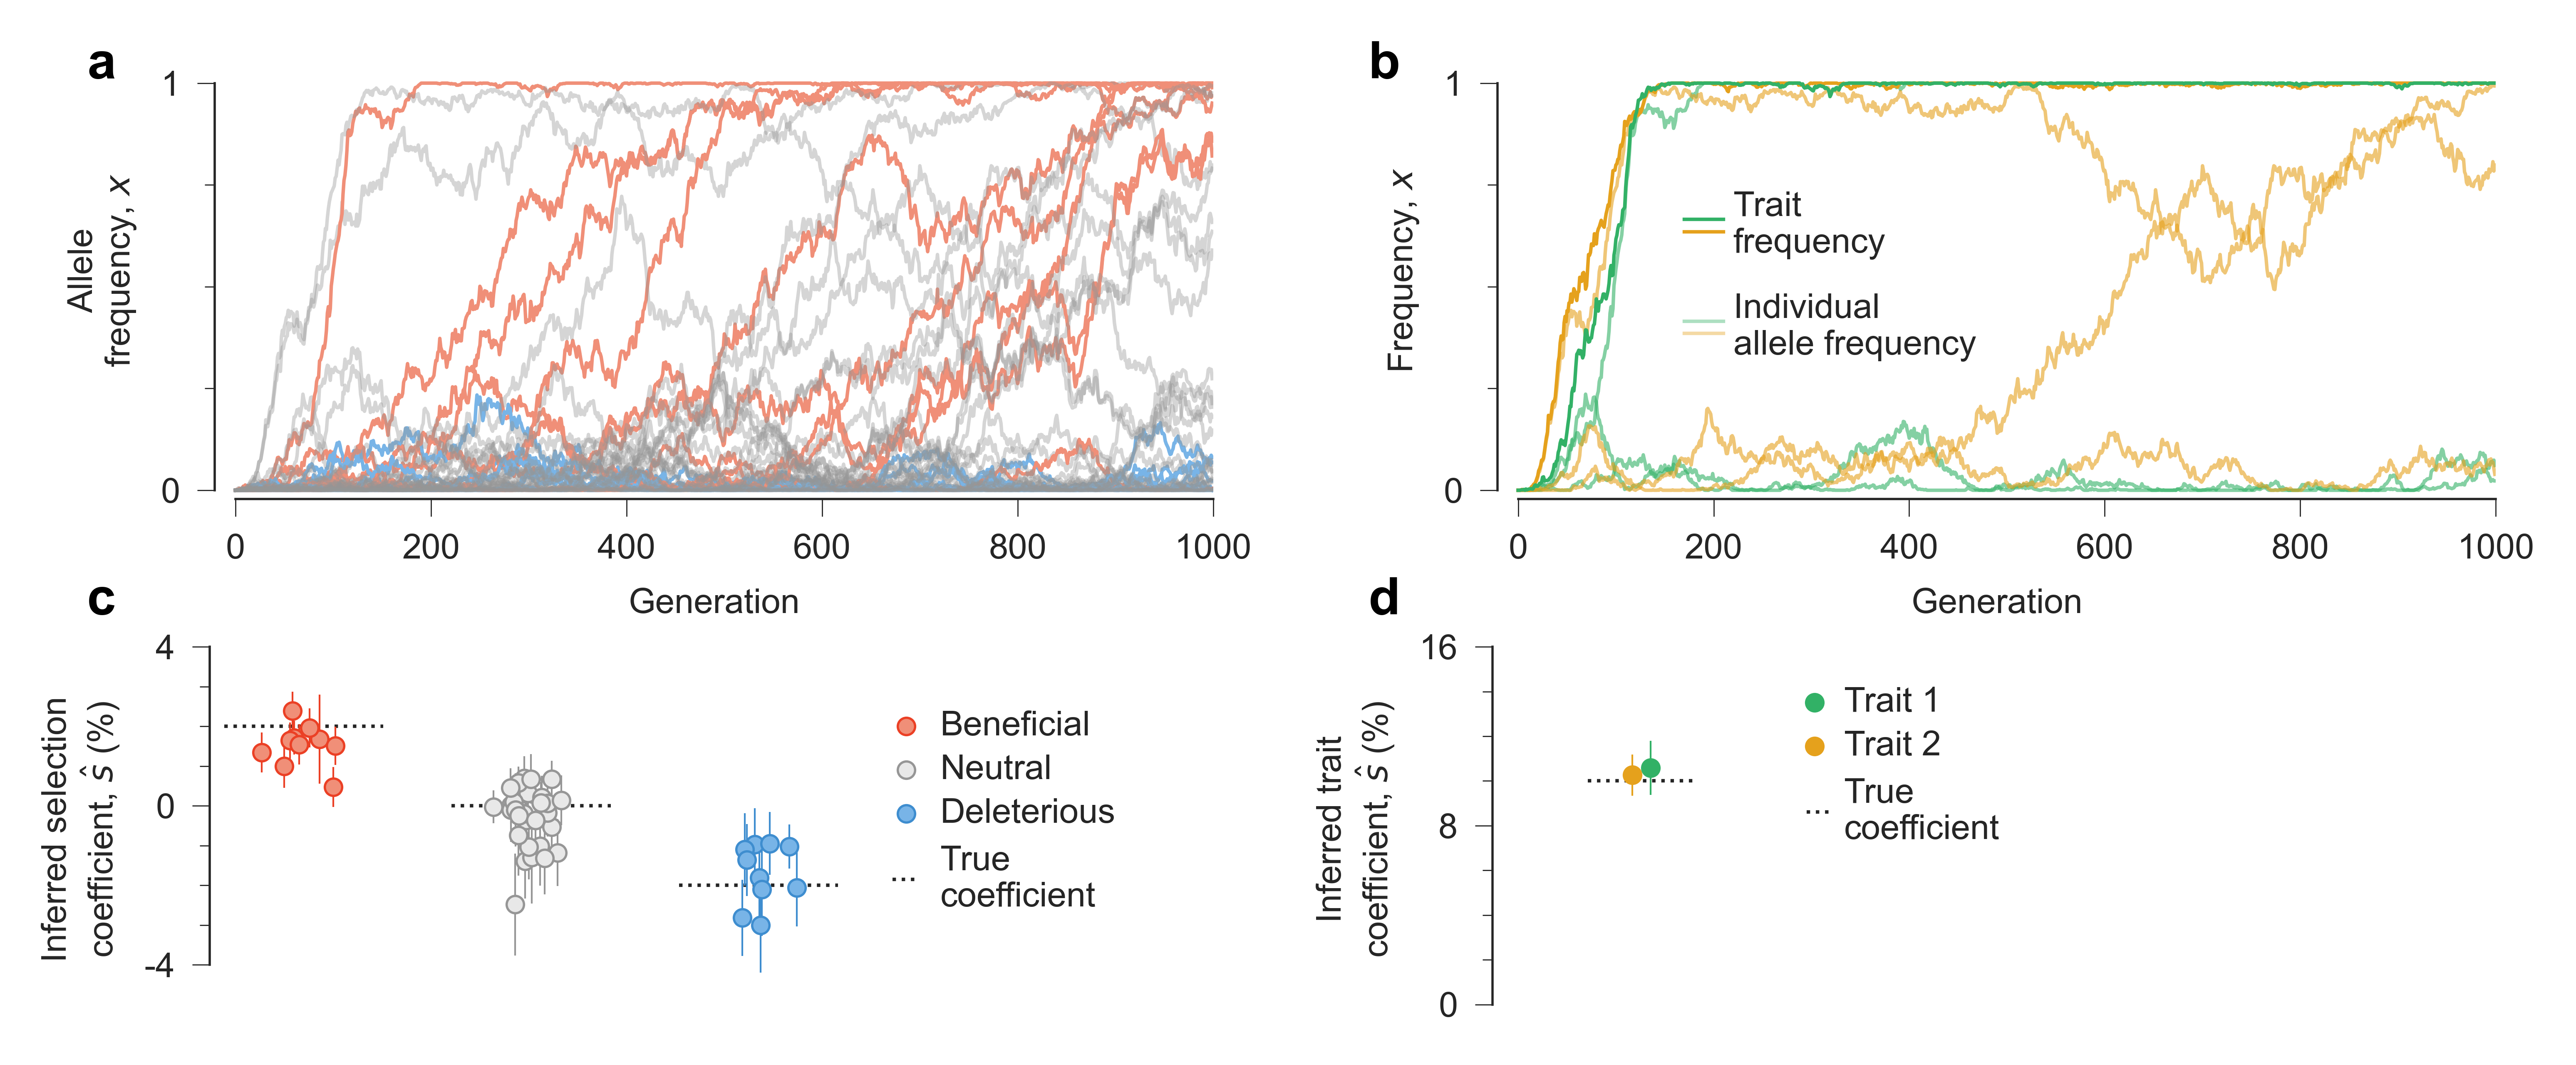

In [2]:
importlib.reload(mp)
importlib.reload(fig)

pdata = {
    'n_gen':   1000,                              # number of generations
    'dg':      1,                                 # spacing between generations for plot
    'N':       1000,                              # population size
    'xfile':   '20_ns1000_dt1',                   # file in directory data/ containing example trajectory _0_T1000_ns1000_dt1
    'n_ben':   10,                                # number of beneficial mutations
    'n_neu':   30,                                # number of neutral mutations
    'n_del':   10,                                # number of deleterious mutations
    'n_tra':   2,                                 # number of trait groups([1,2,3],[11,12,13])
    's_ben':   0.02,                              # selection coefficient of beneficial mutations
    's_neu':   0,                                 # selection coefficient of neutral mutations
    's_del':   -0.02,                             # selection coefficient of deleterious mutations
    's_tra':   0.1,                               # trait coefficient
    'r_seed':  1,                                 # random seed for scattering inferred selection coefficients
    'show_fig':True,                              # if show figure here and save it in figures folder
}

fig.plot_example_mpl(**pdata)

# '''plot path and inferrred coefficients for all examples'''
# pdata['show_fig'] = False
# for i in range(100):
#     pdata['xfile'] = str(i)+'_ns1000_dt1'
#     fig.plot_example_mpl(**pdata)

<a id='su:Figure_1'></a>
### Supplementary Figure 1 Histogram for simulation
a. selection coefficients; b. trait coefficients

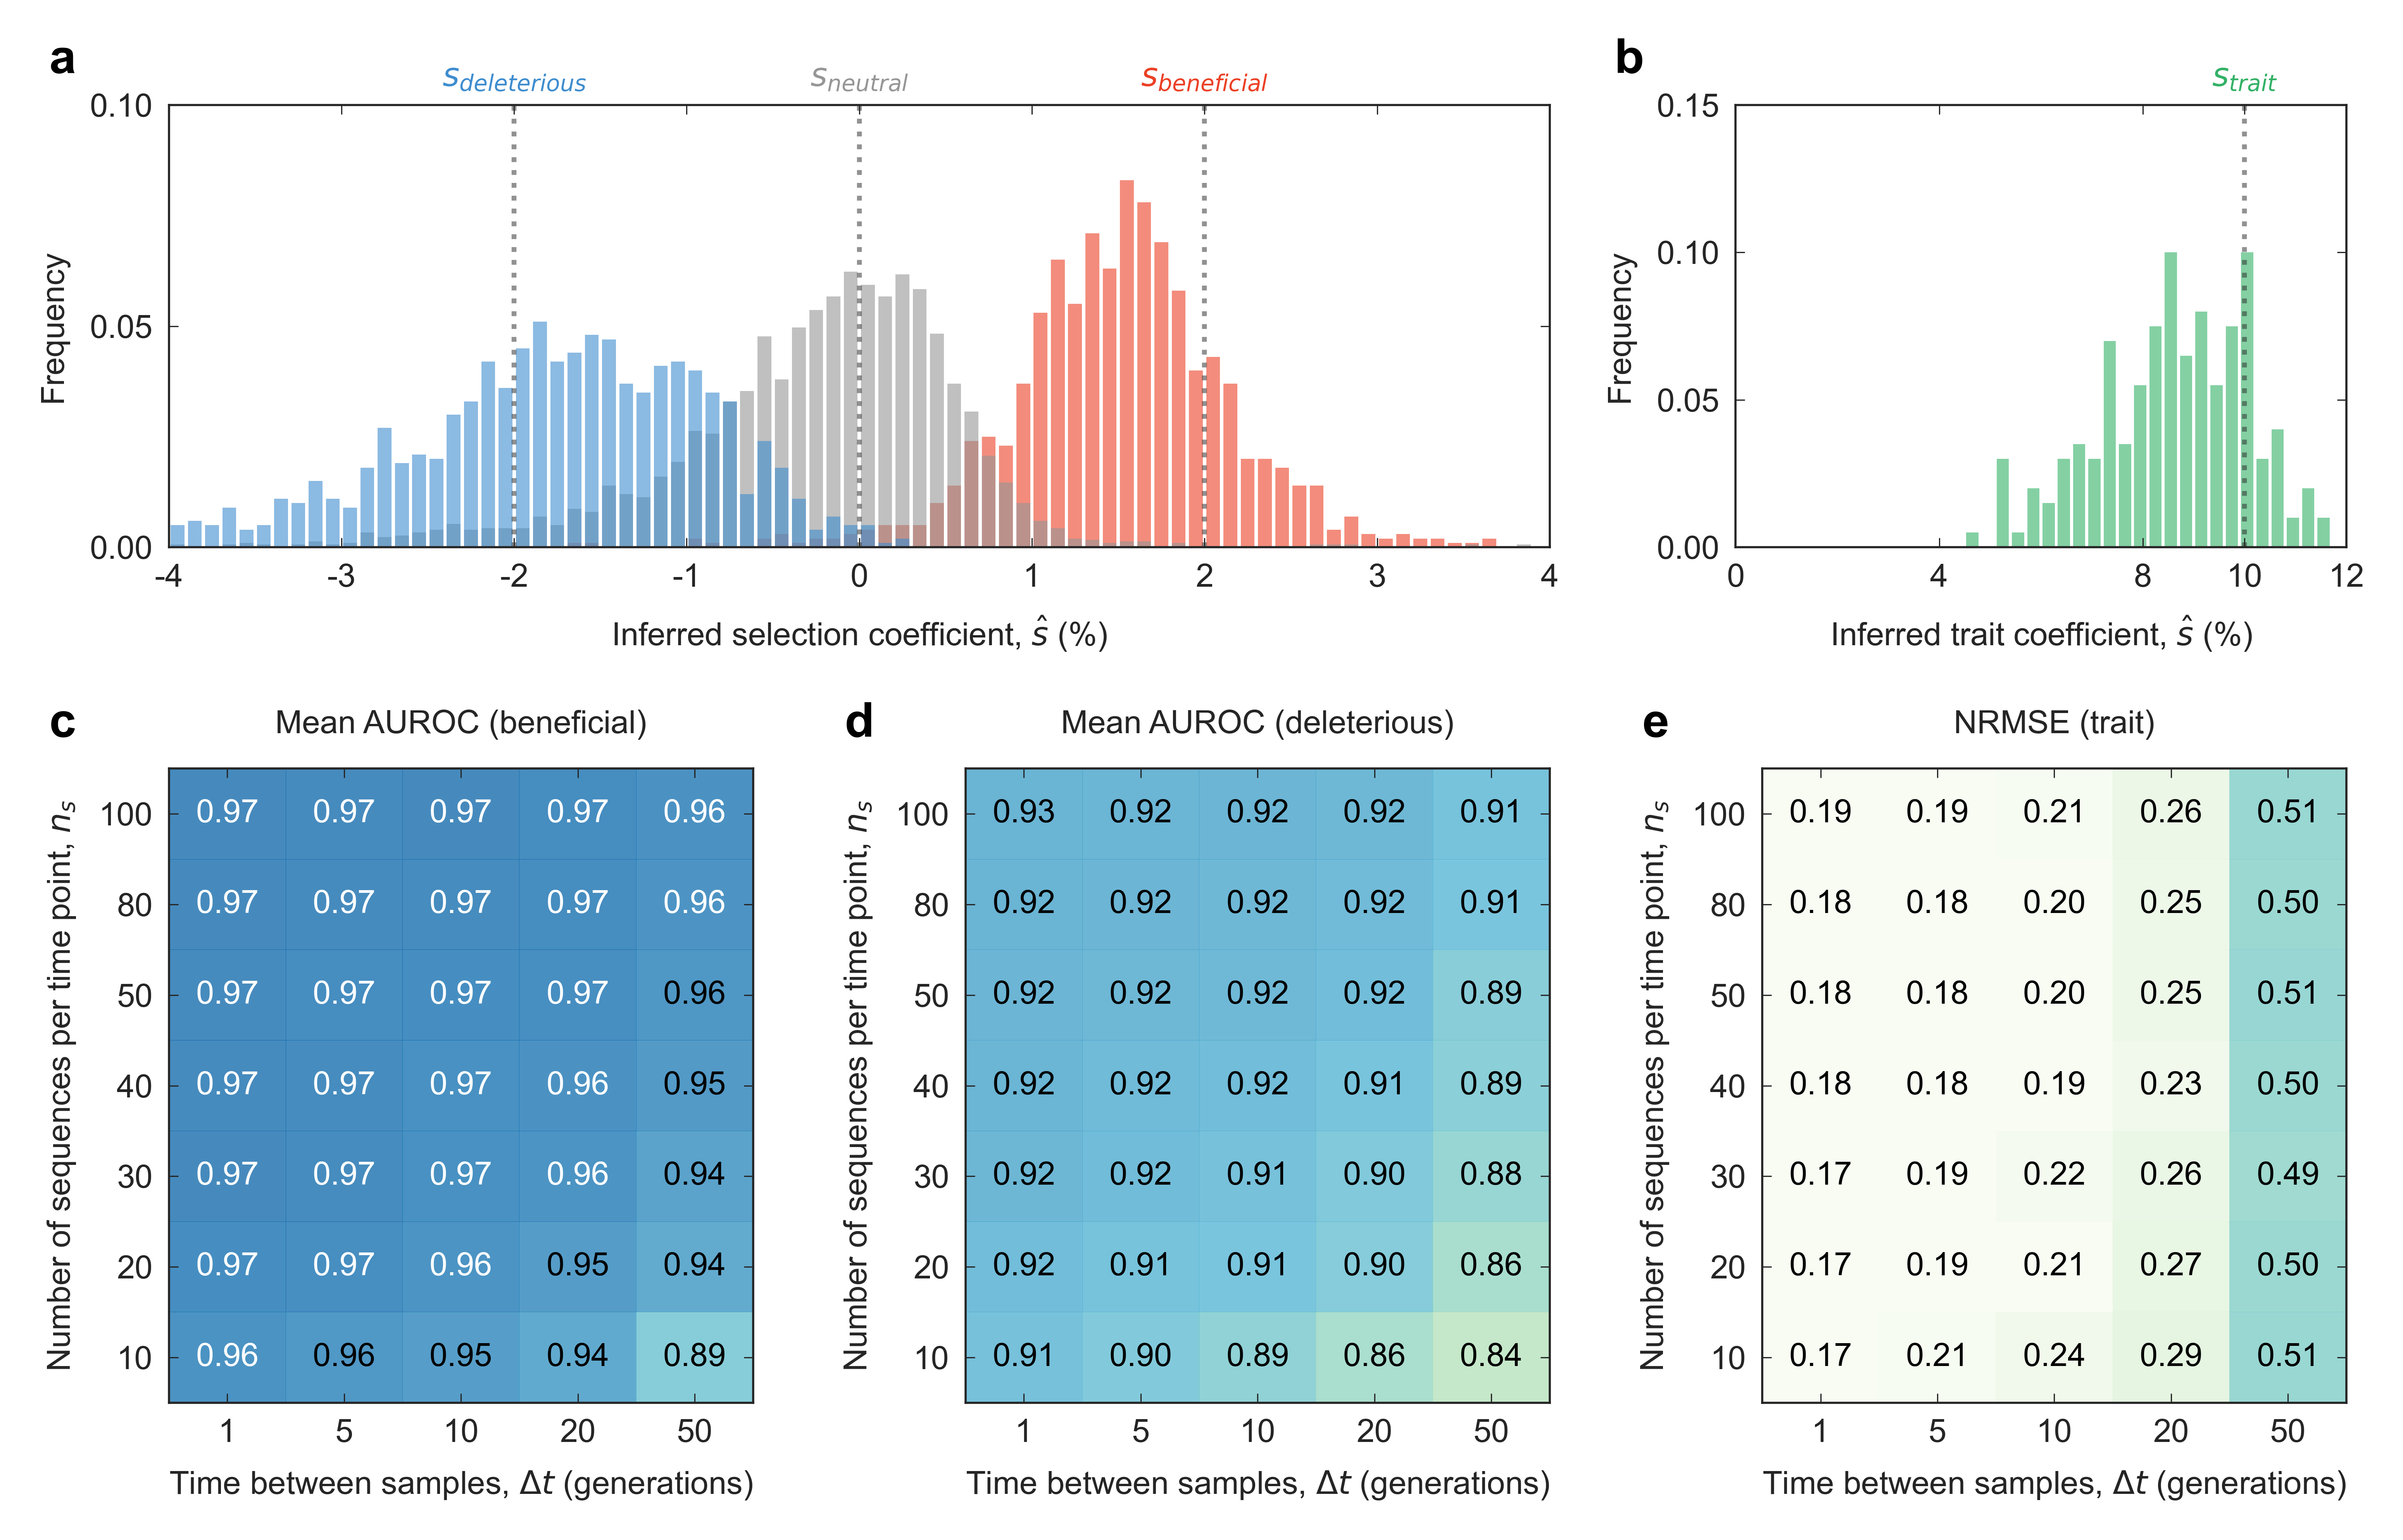

In [17]:
importlib.reload(mp)
importlib.reload(fig)

pdata = {
    'n_ben':   10,                                # number of beneficial mutations
    'n_neu':   30,                                # number of neutral mutations
    'n_del':   10,                                # number of deleterious mutations
    'n_tra':   2,                                 # number of trait groups([1,2,3],[11,12,13])
    's_ben':   0.02,                              # selection coefficient of beneficial mutations
    's_neu':   0,                                 # selection coefficient of neutral mutations
    's_del':   -0.02,                             # selection coefficient of deleterious mutations
    's_tra':   0.1,                               # trait coefficient
}

fig.plot_histogram_sim(**pdata)
plt.show()


<a id='su:Figure_2'></a>
### Supplementary Figure 2. Histogram for simulation with vs without recombination term
a. without recombination term\
b. with recombination term

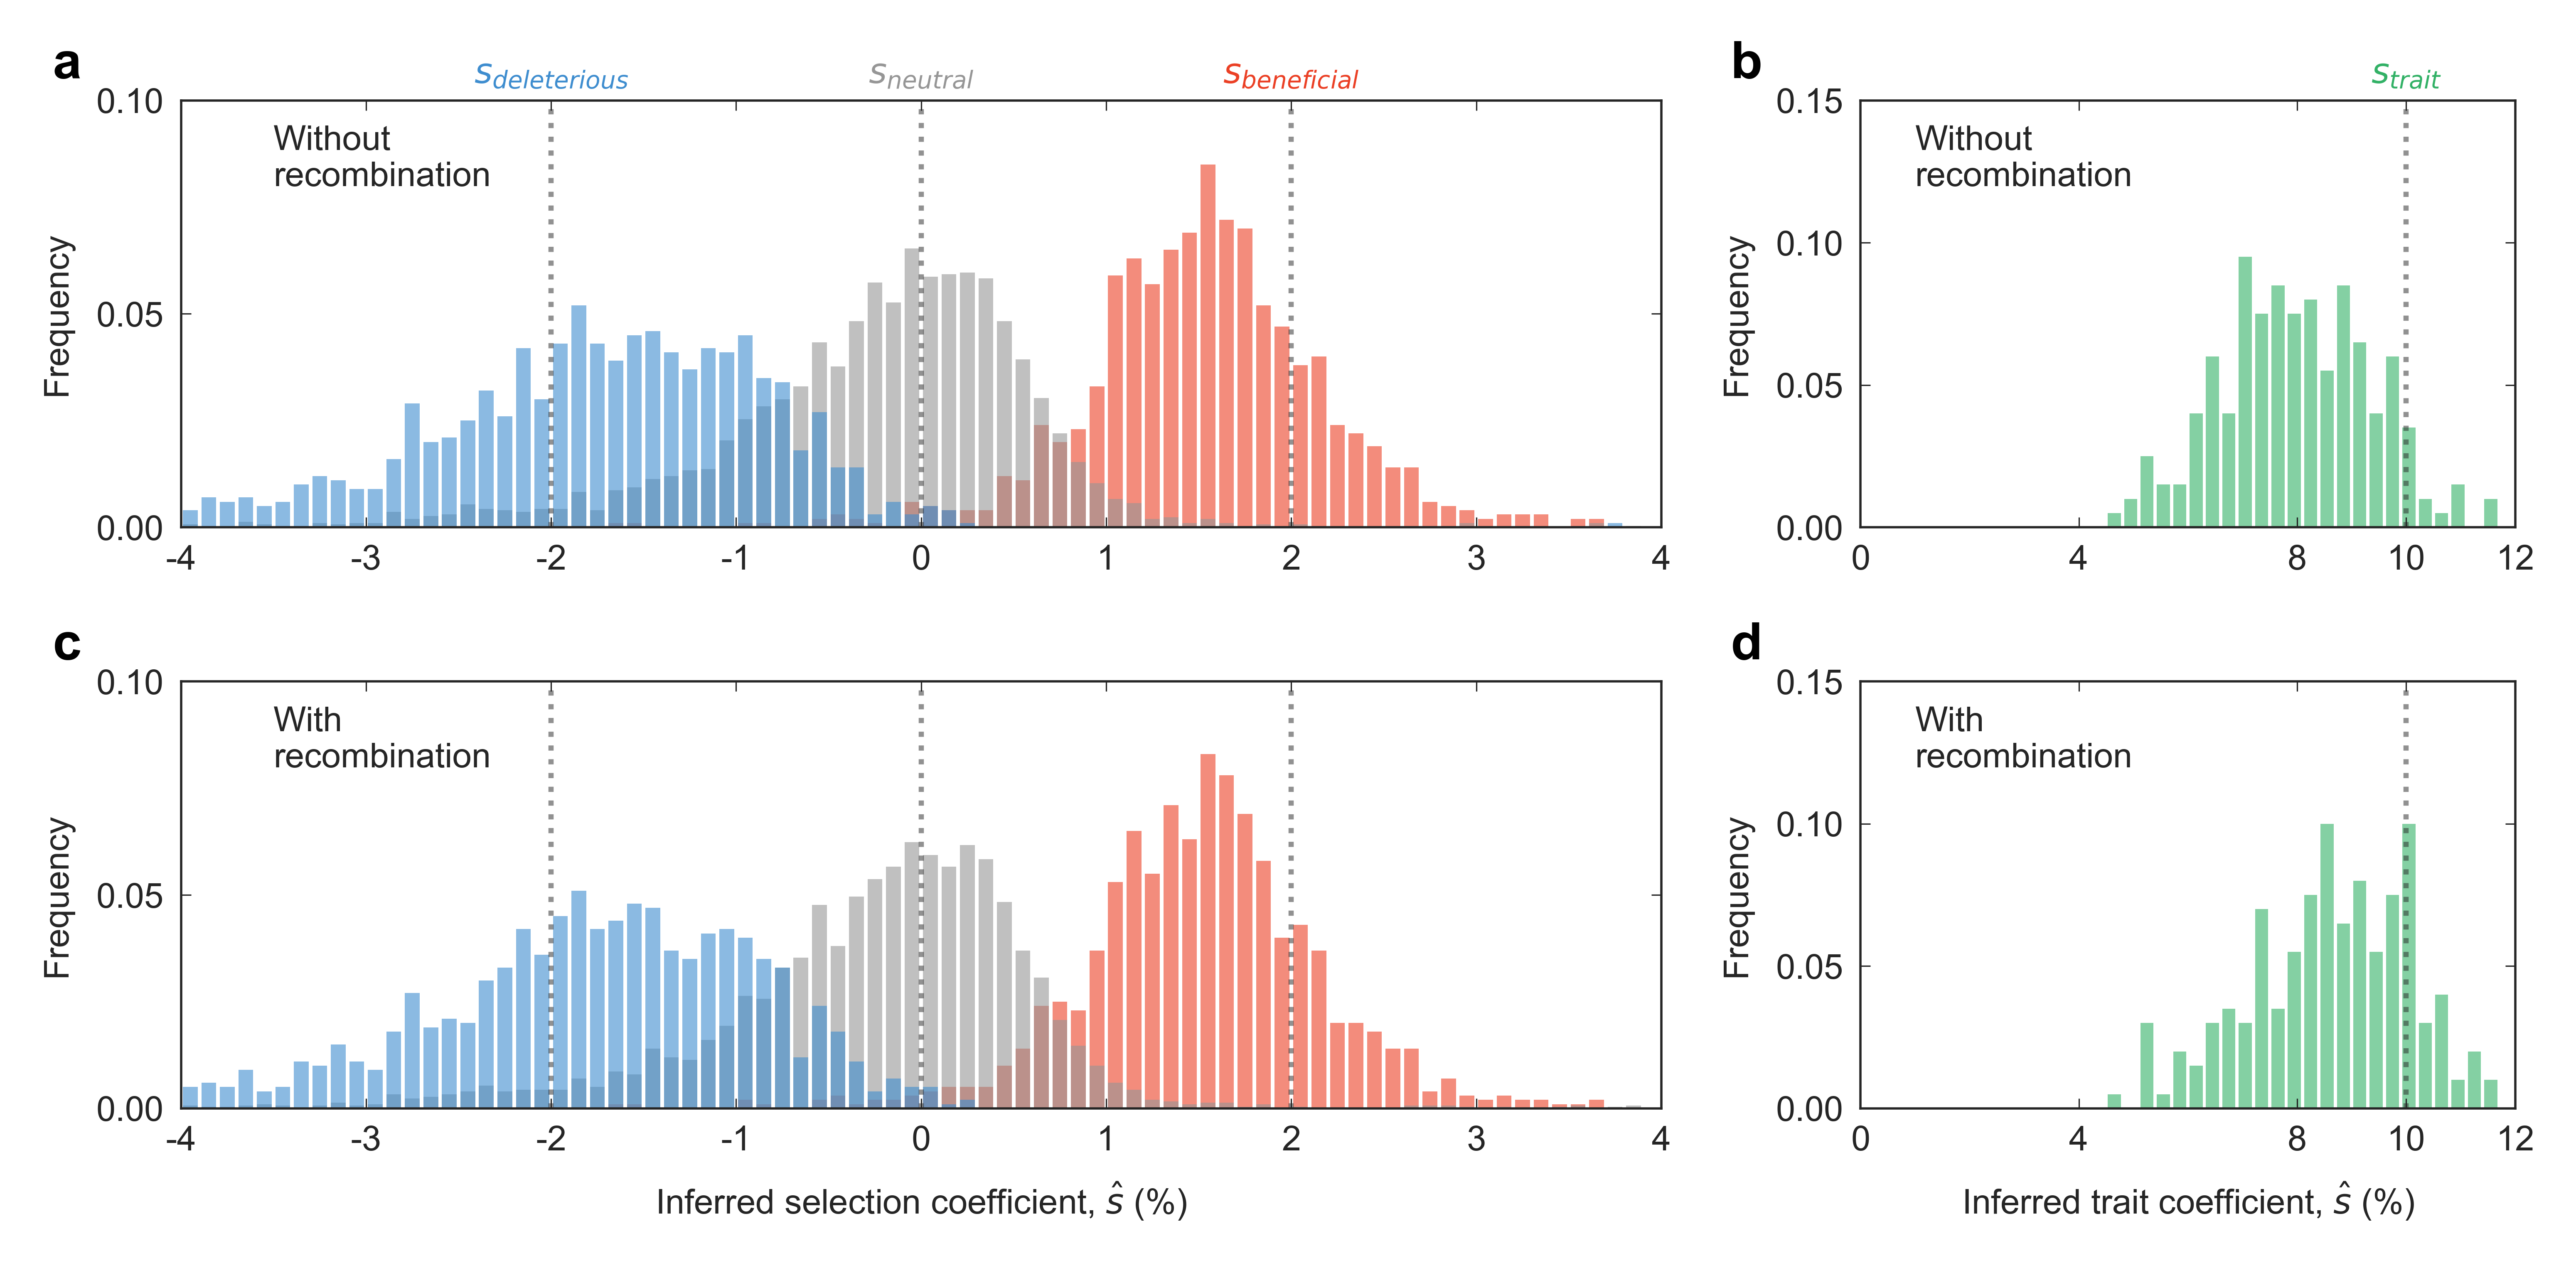

In [18]:
importlib.reload(mp)
importlib.reload(fig)

pdata = {
    'n_ben':   10,                                # number of beneficial mutations
    'n_neu':   30,                                # number of neutral mutations
    'n_del':   10,                                # number of deleterious mutations
    'n_tra':   2,                                 # number of trait groups([1,2,3],[11,12,13])
    's_ben':   0.02,                              # selection coefficient of beneficial mutations
    's_neu':   0,                                 # selection coefficient of neutral mutations
    's_del':   -0.02,                             # selection coefficient of deleterious mutations
    's_tra':   0.1,                               # trait coefficient
}

fig.plot_histogram_sim_rec(**pdata)
plt.show()

<a id='Figure_2'></a>
### Figure 2.  Trait coefficients and fitness fraction due to escape trait for all patients
a. trait coefficients histogram,\
b. fitness gain fraction due to escape trait. \
Fraction = (sum of all trait coefficients + sum of selection coefficients for special sites)/(total fitness - 1). \
Set the range of the value is [0,1].

figure done.


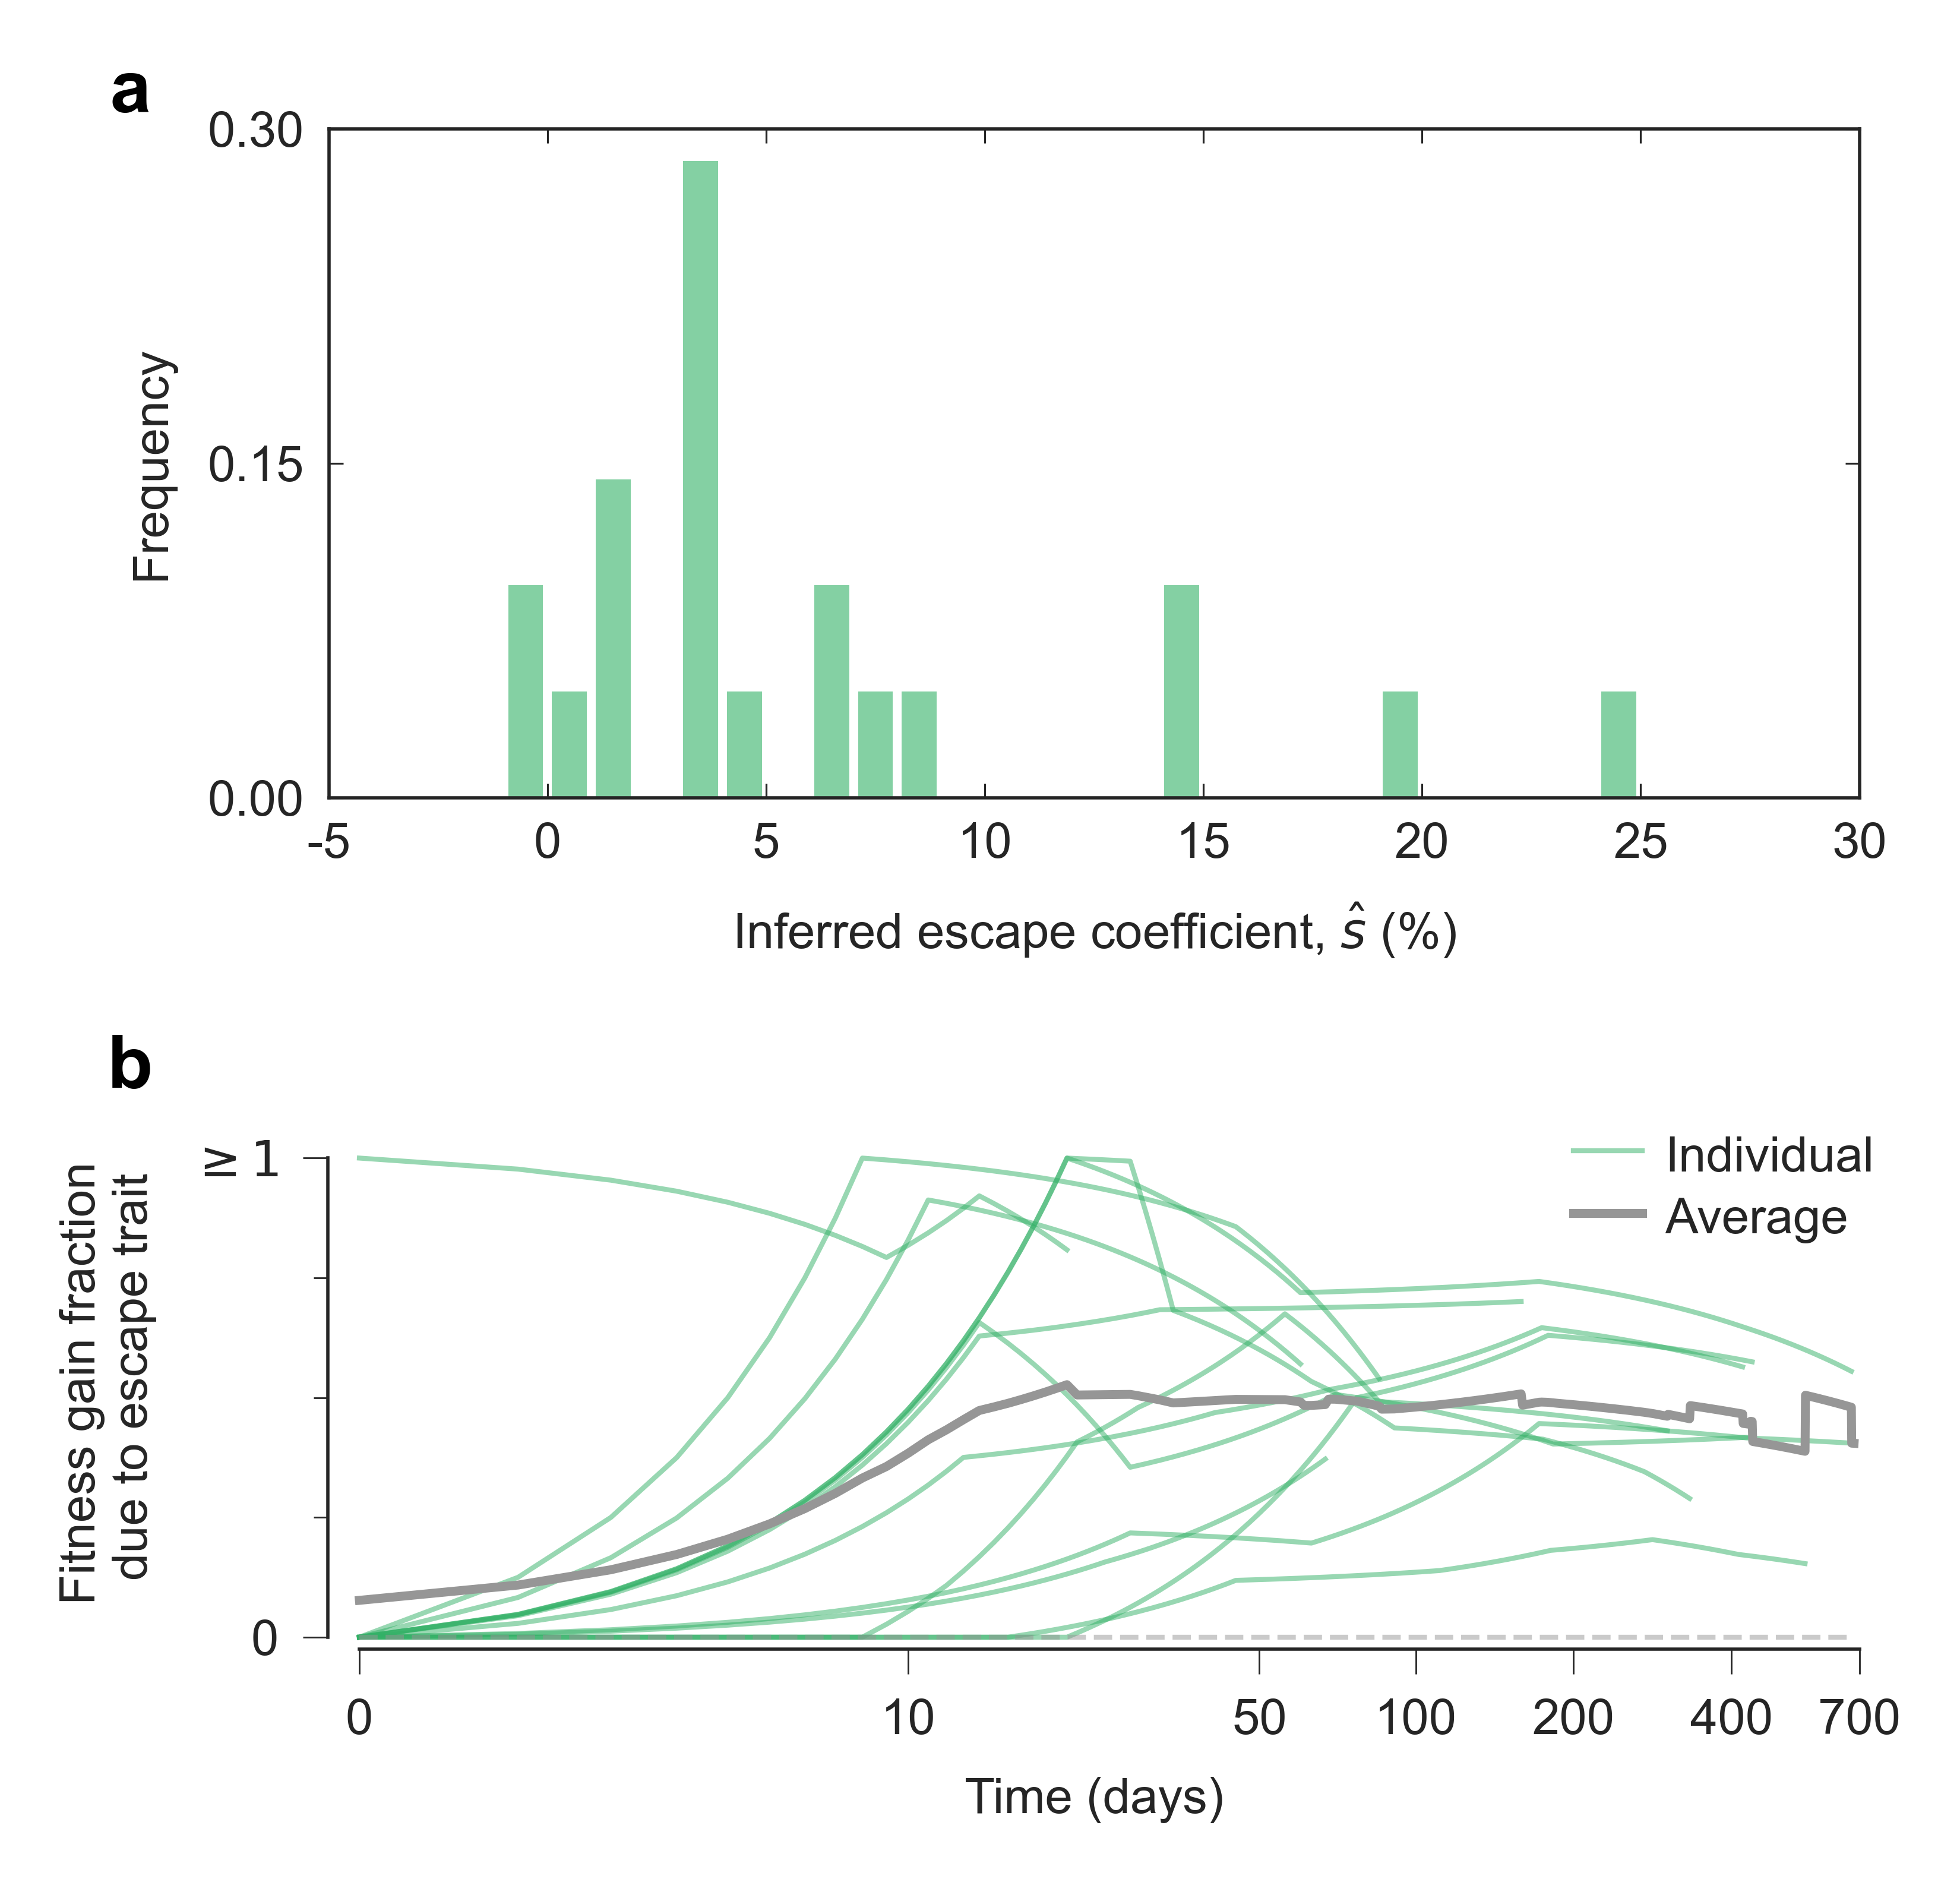

In [19]:
import re

importlib.reload(mp)
importlib.reload(fig)

pdata = {
    'tags':       ['700010040-3','700010058-3','700010077-3','700010470-3',
                   '700010470-5','700010607-3','703010131-3','703010131-5',
                   '703010159-3','703010256-3','703010256-5','704010042-3',
                   '705010162-3','705010162-5','705010185-5','705010198-3',
                   '706010164-3'],
    'ppts':       ['700010470', '700010077', '700010058', '700010040', '700010607',
                   '706010164', '705010198', '705010185', '705010162', '704010042', 
                   '703010256', '703010159', '703010131'],
}

fig.plot_histogram_fraction_HIV(**pdata)
plt.show()

<a id='su:Figure_3'></a>
### Supplementary figure 3. Inferred selection coefficients without vs with escape trait

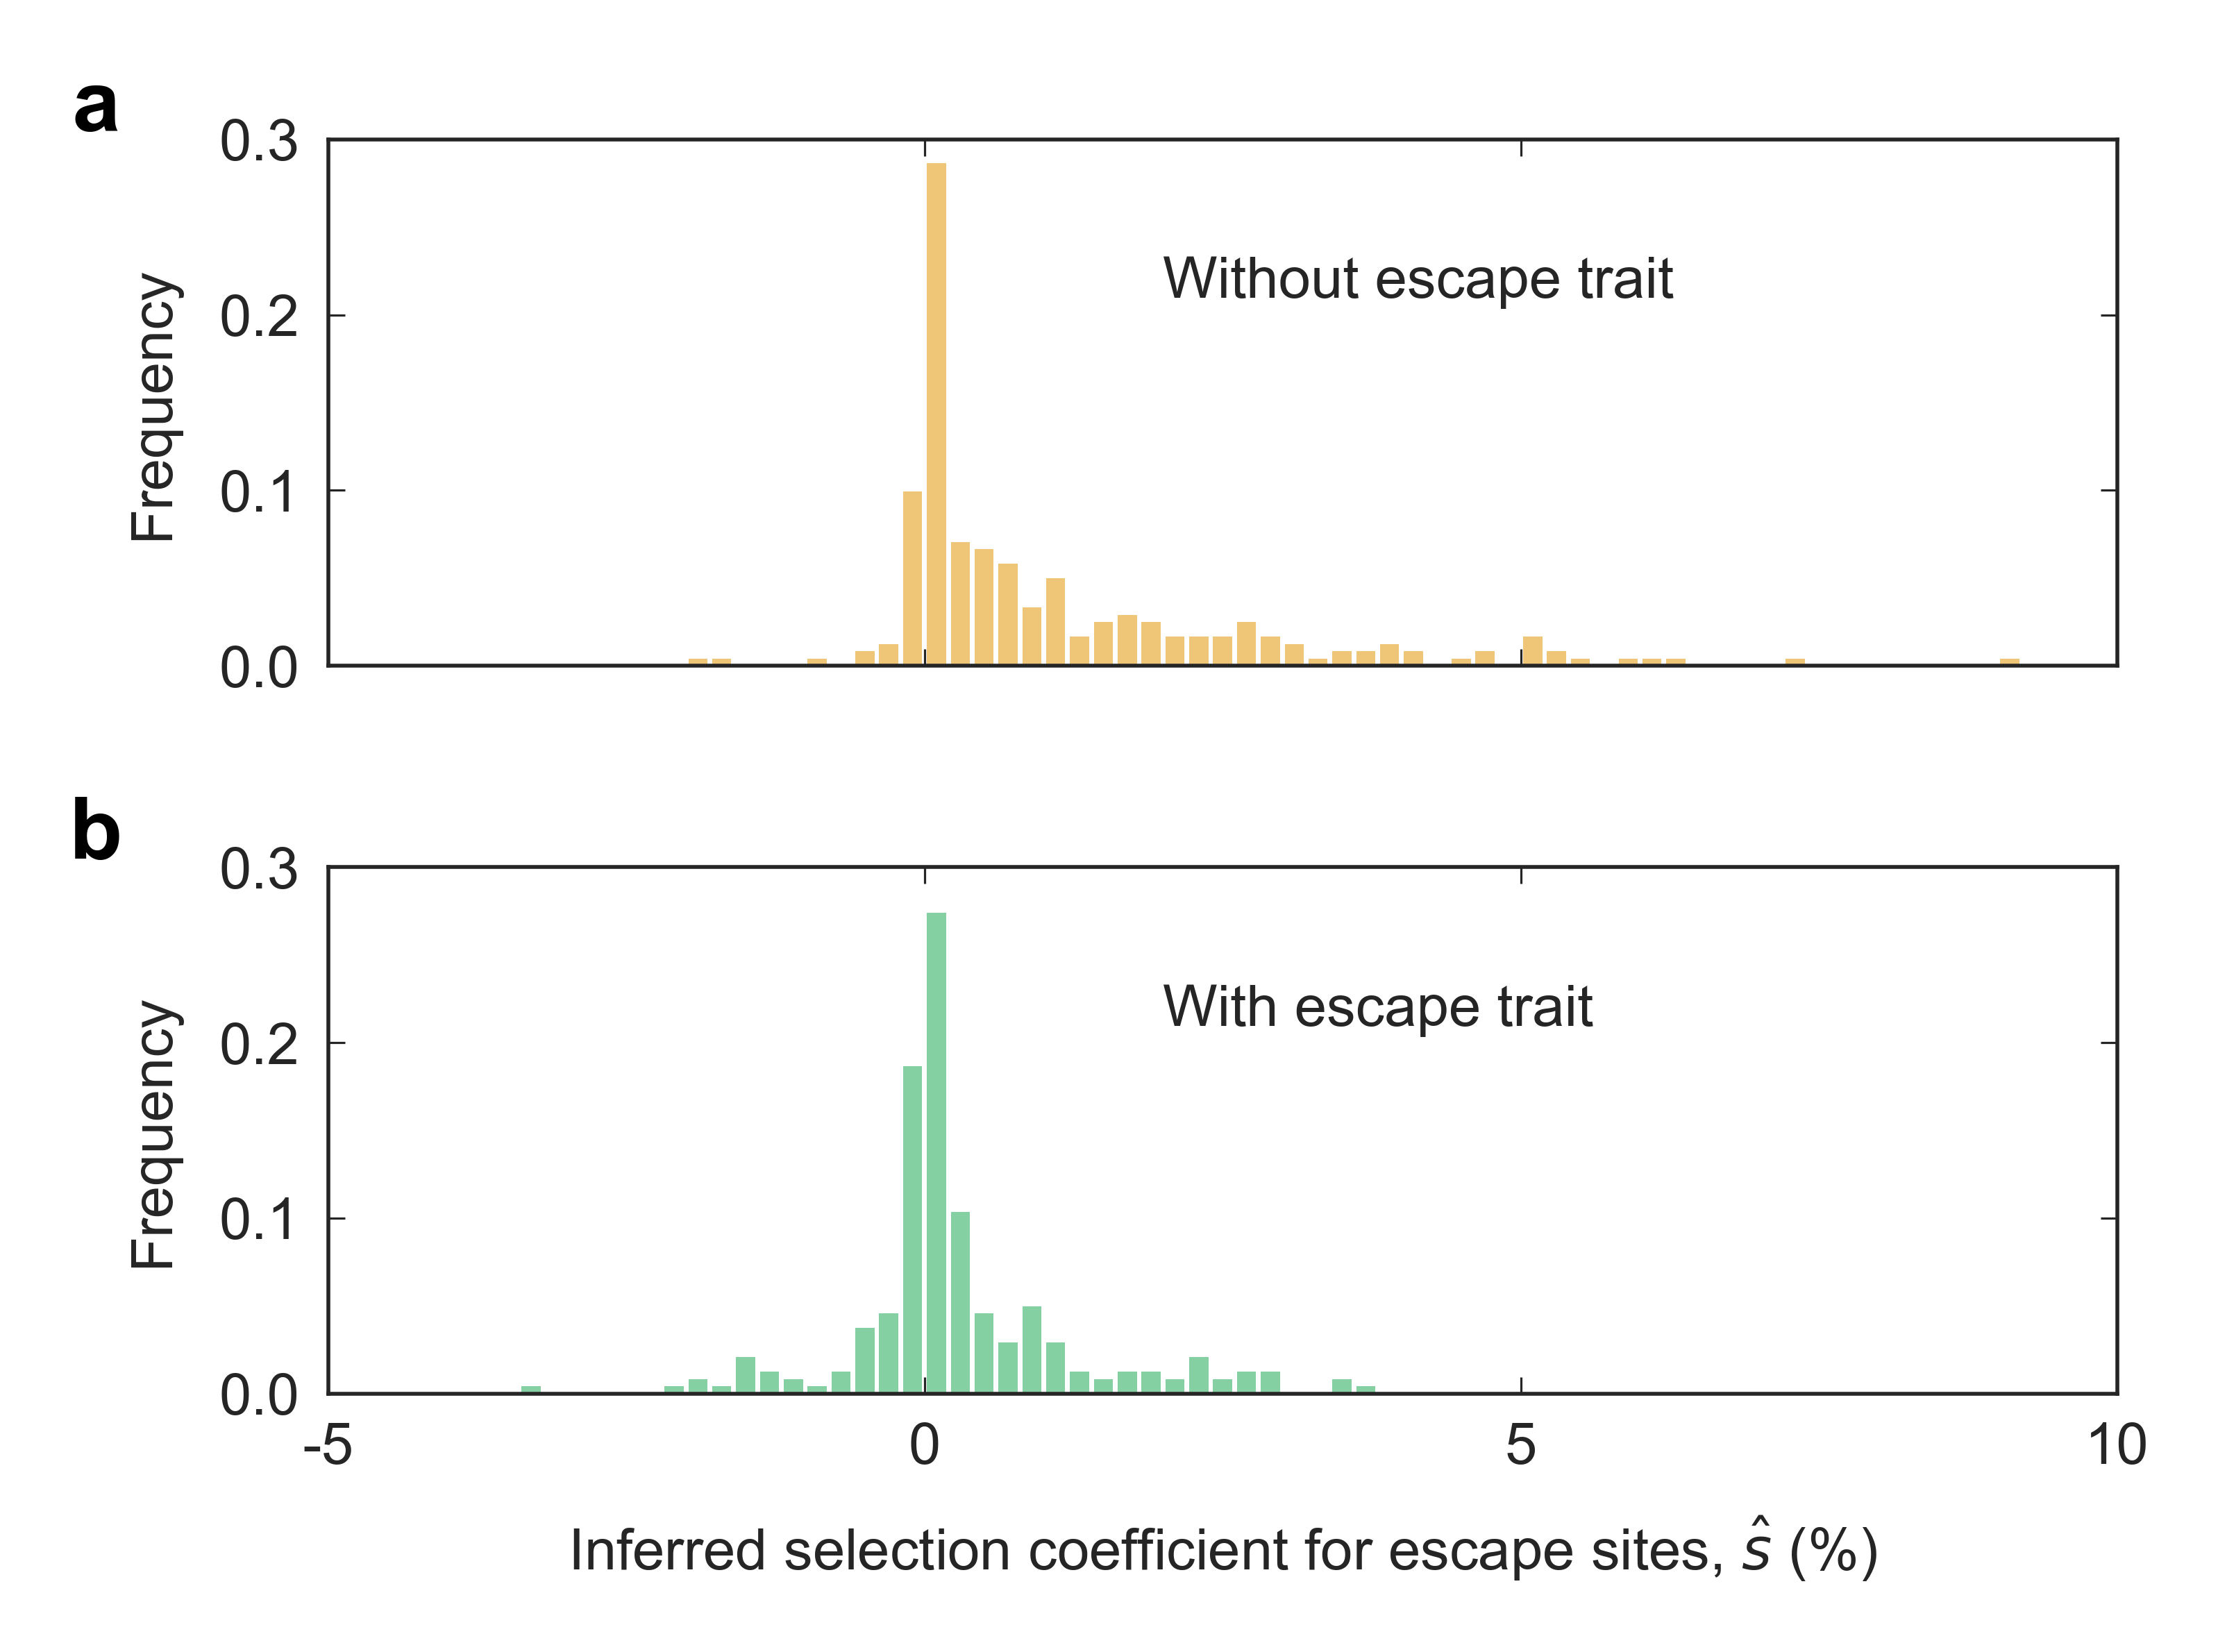

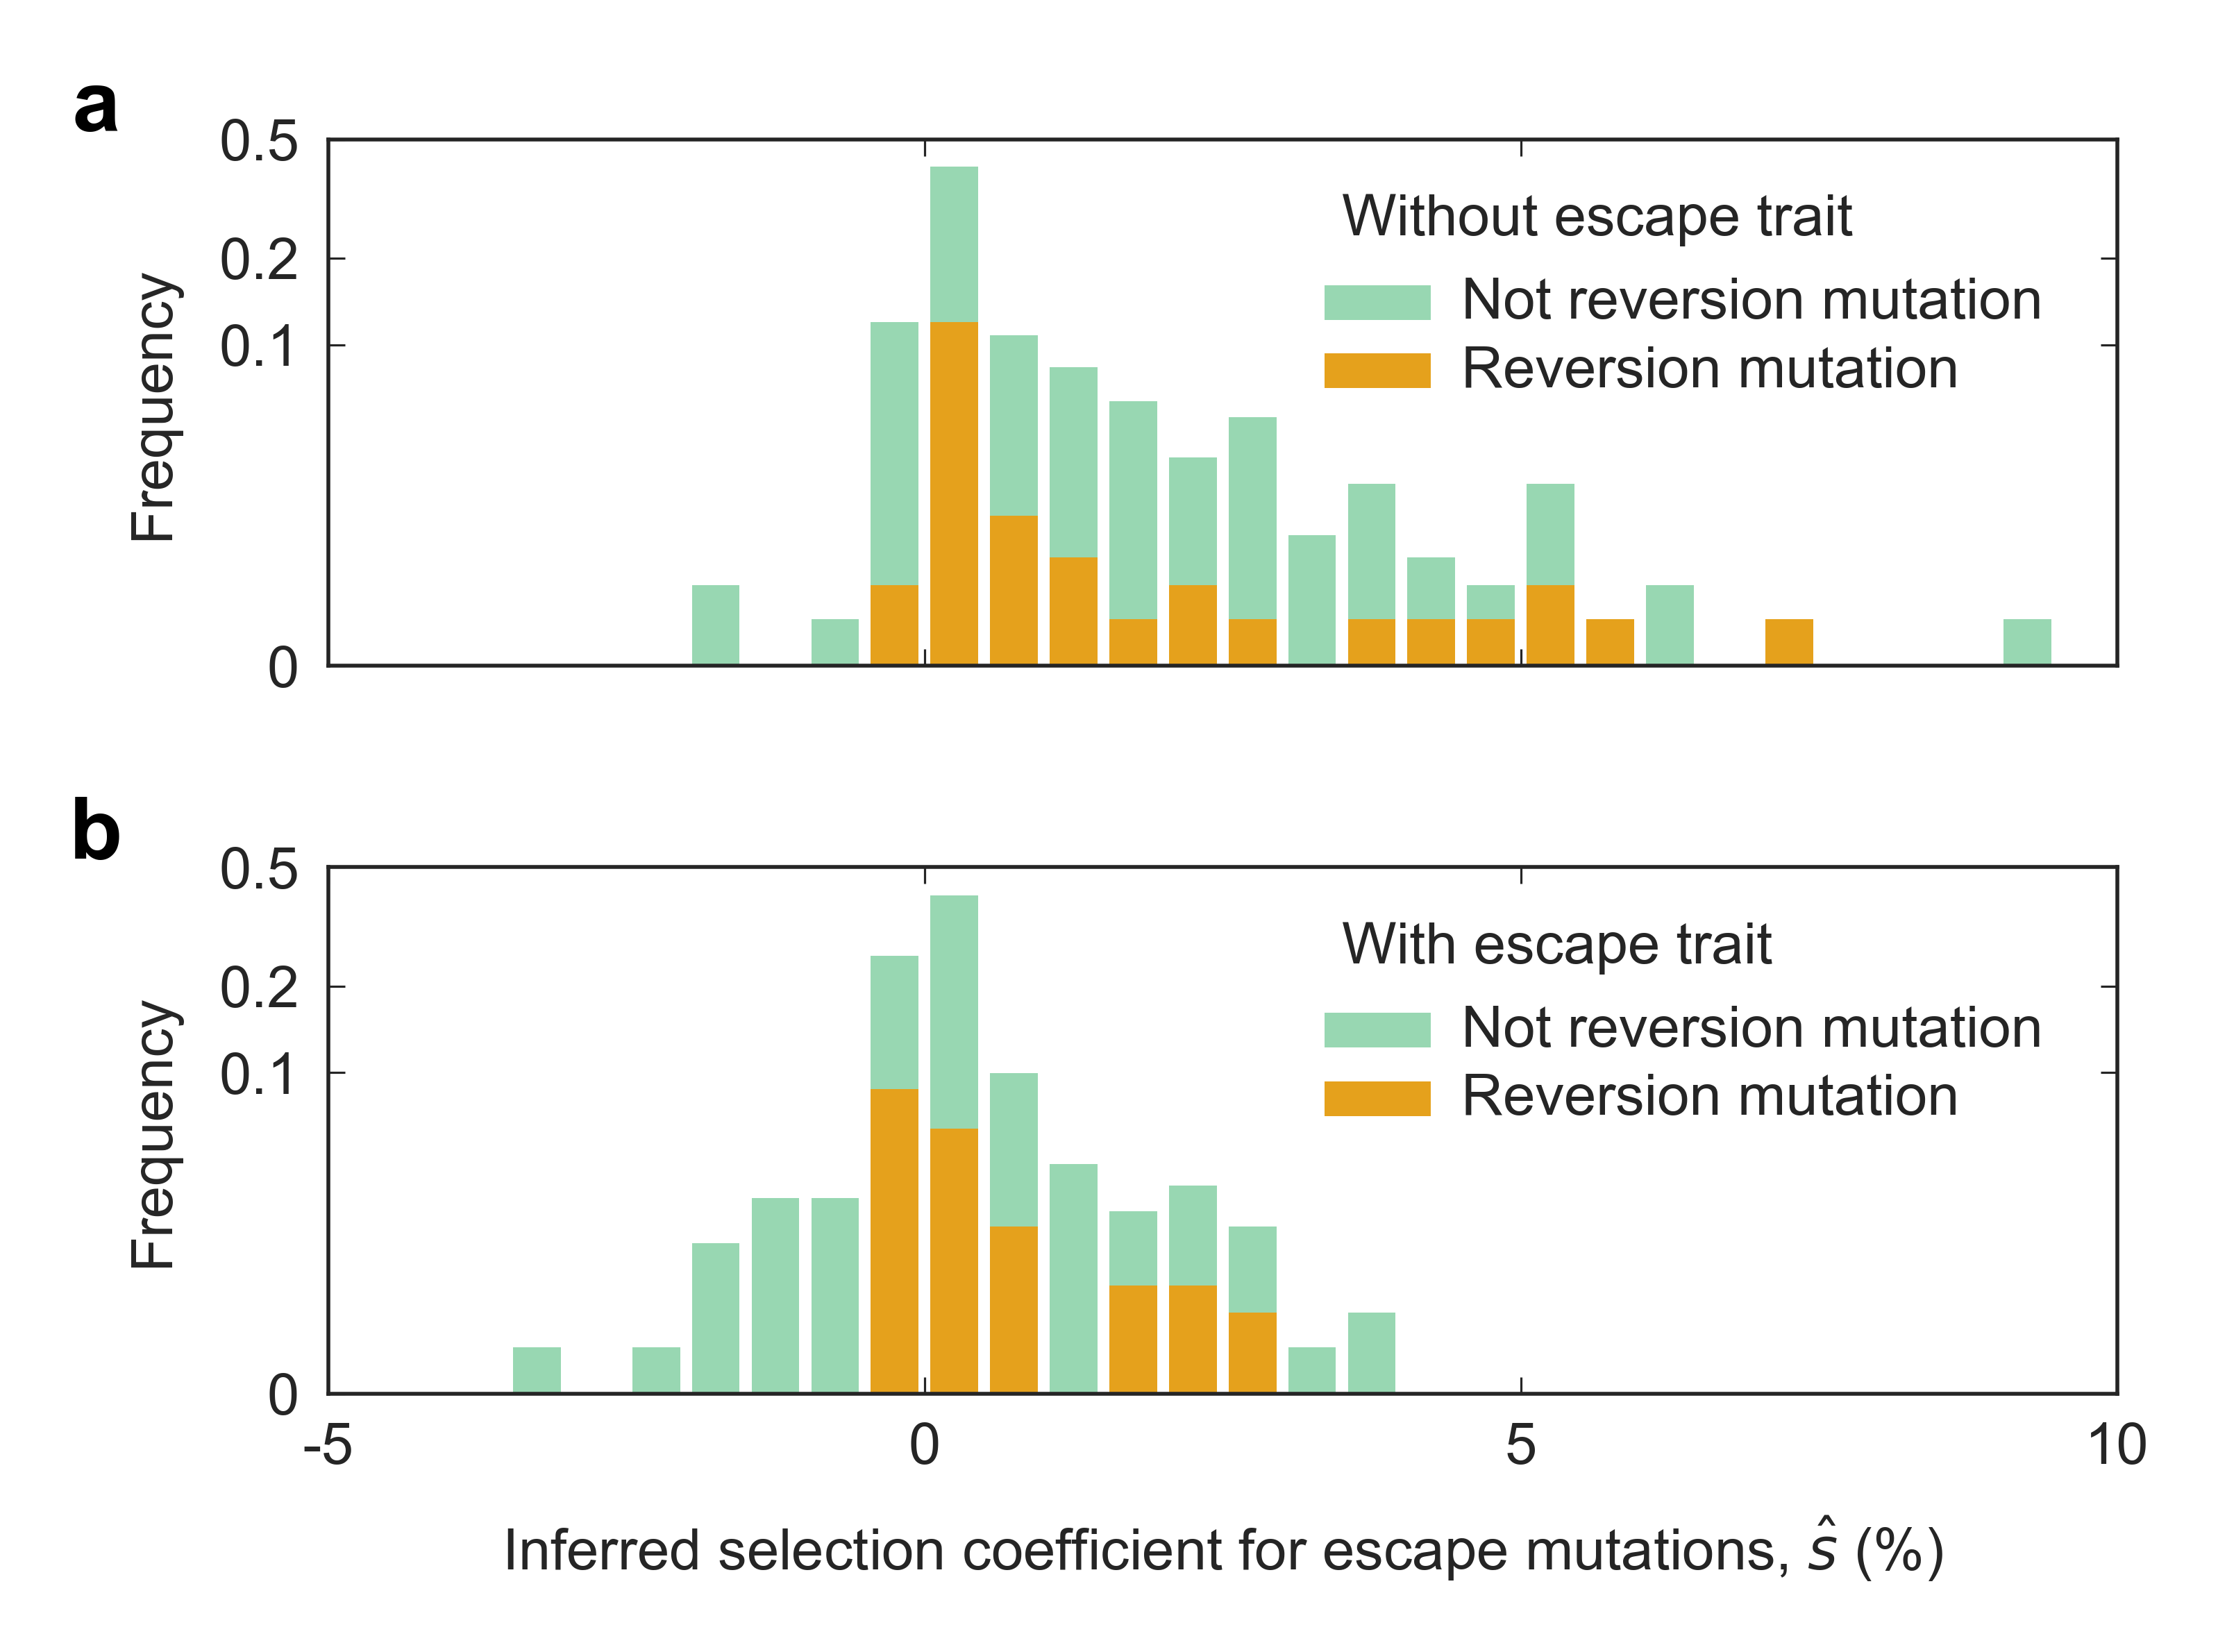

In [7]:
importlib.reload(mp)
importlib.reload(fig)

pdata = {
    'tags':       ['700010040-3','700010058-3','700010077-3','700010470-3',
                   '700010470-5','700010607-3','703010131-3','703010131-5',
                   '703010159-3','703010256-3','703010256-5','704010042-3',
                   '705010162-3','705010162-5','705010185-5','705010198-3',
                   '706010164-3']
}

fig.plot_sc_escape(**pdata)
fig.plot_trait_site_reversion(**pdata)
plt.show()

<a id='su:Figure_4'></a>
### Supplementary figure 4. Inferred trait coefficients without vs with recombination term

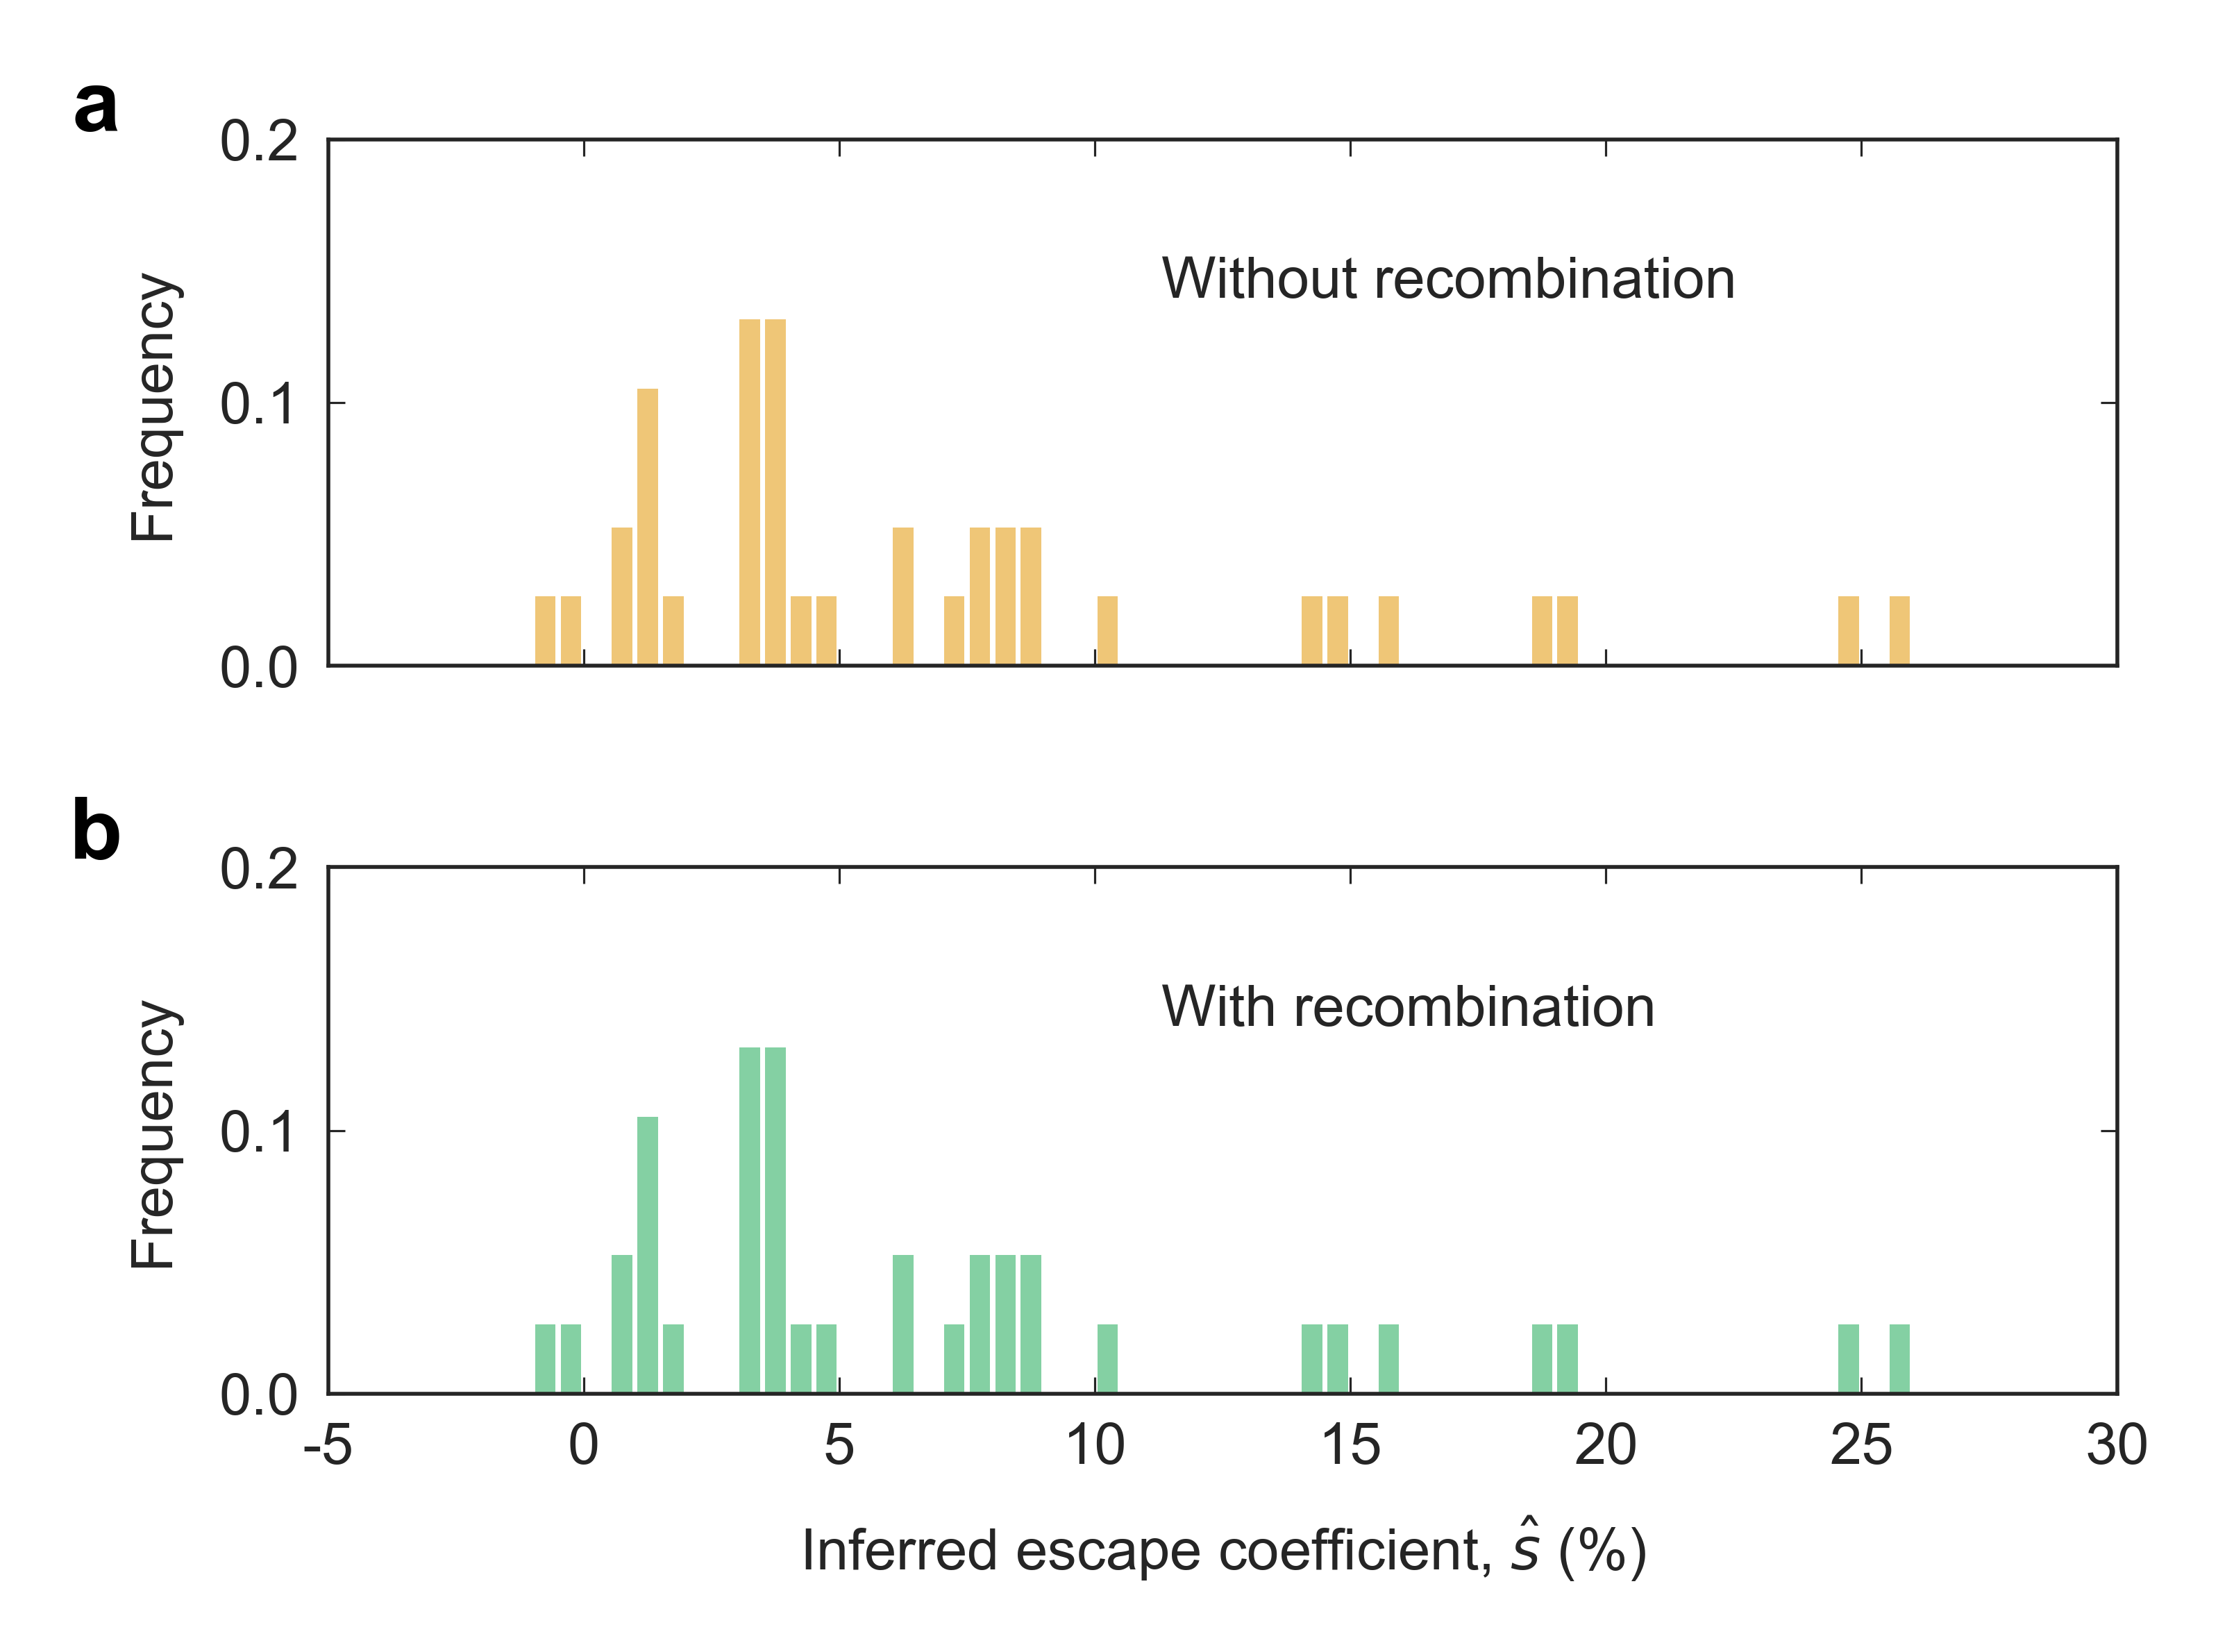

In [8]:
importlib.reload(mp)
importlib.reload(fig)

pdata = {
    'tags':       ['700010040-3','700010058-3','700010077-3','700010470-3',
                   '700010470-5','700010607-3','703010131-3','703010131-5',
                   '703010159-3','703010256-3','703010256-5','704010042-3',
                   '705010162-3','705010162-5','705010185-5','705010198-3',
                   '706010164-3'],
}

fig.plot_tc_rec(**pdata)
plt.show()

<a id='su:Figure_5'></a>
### Supplementary figure 5. Fitness gain due to reversion mutations

figure reversion done.


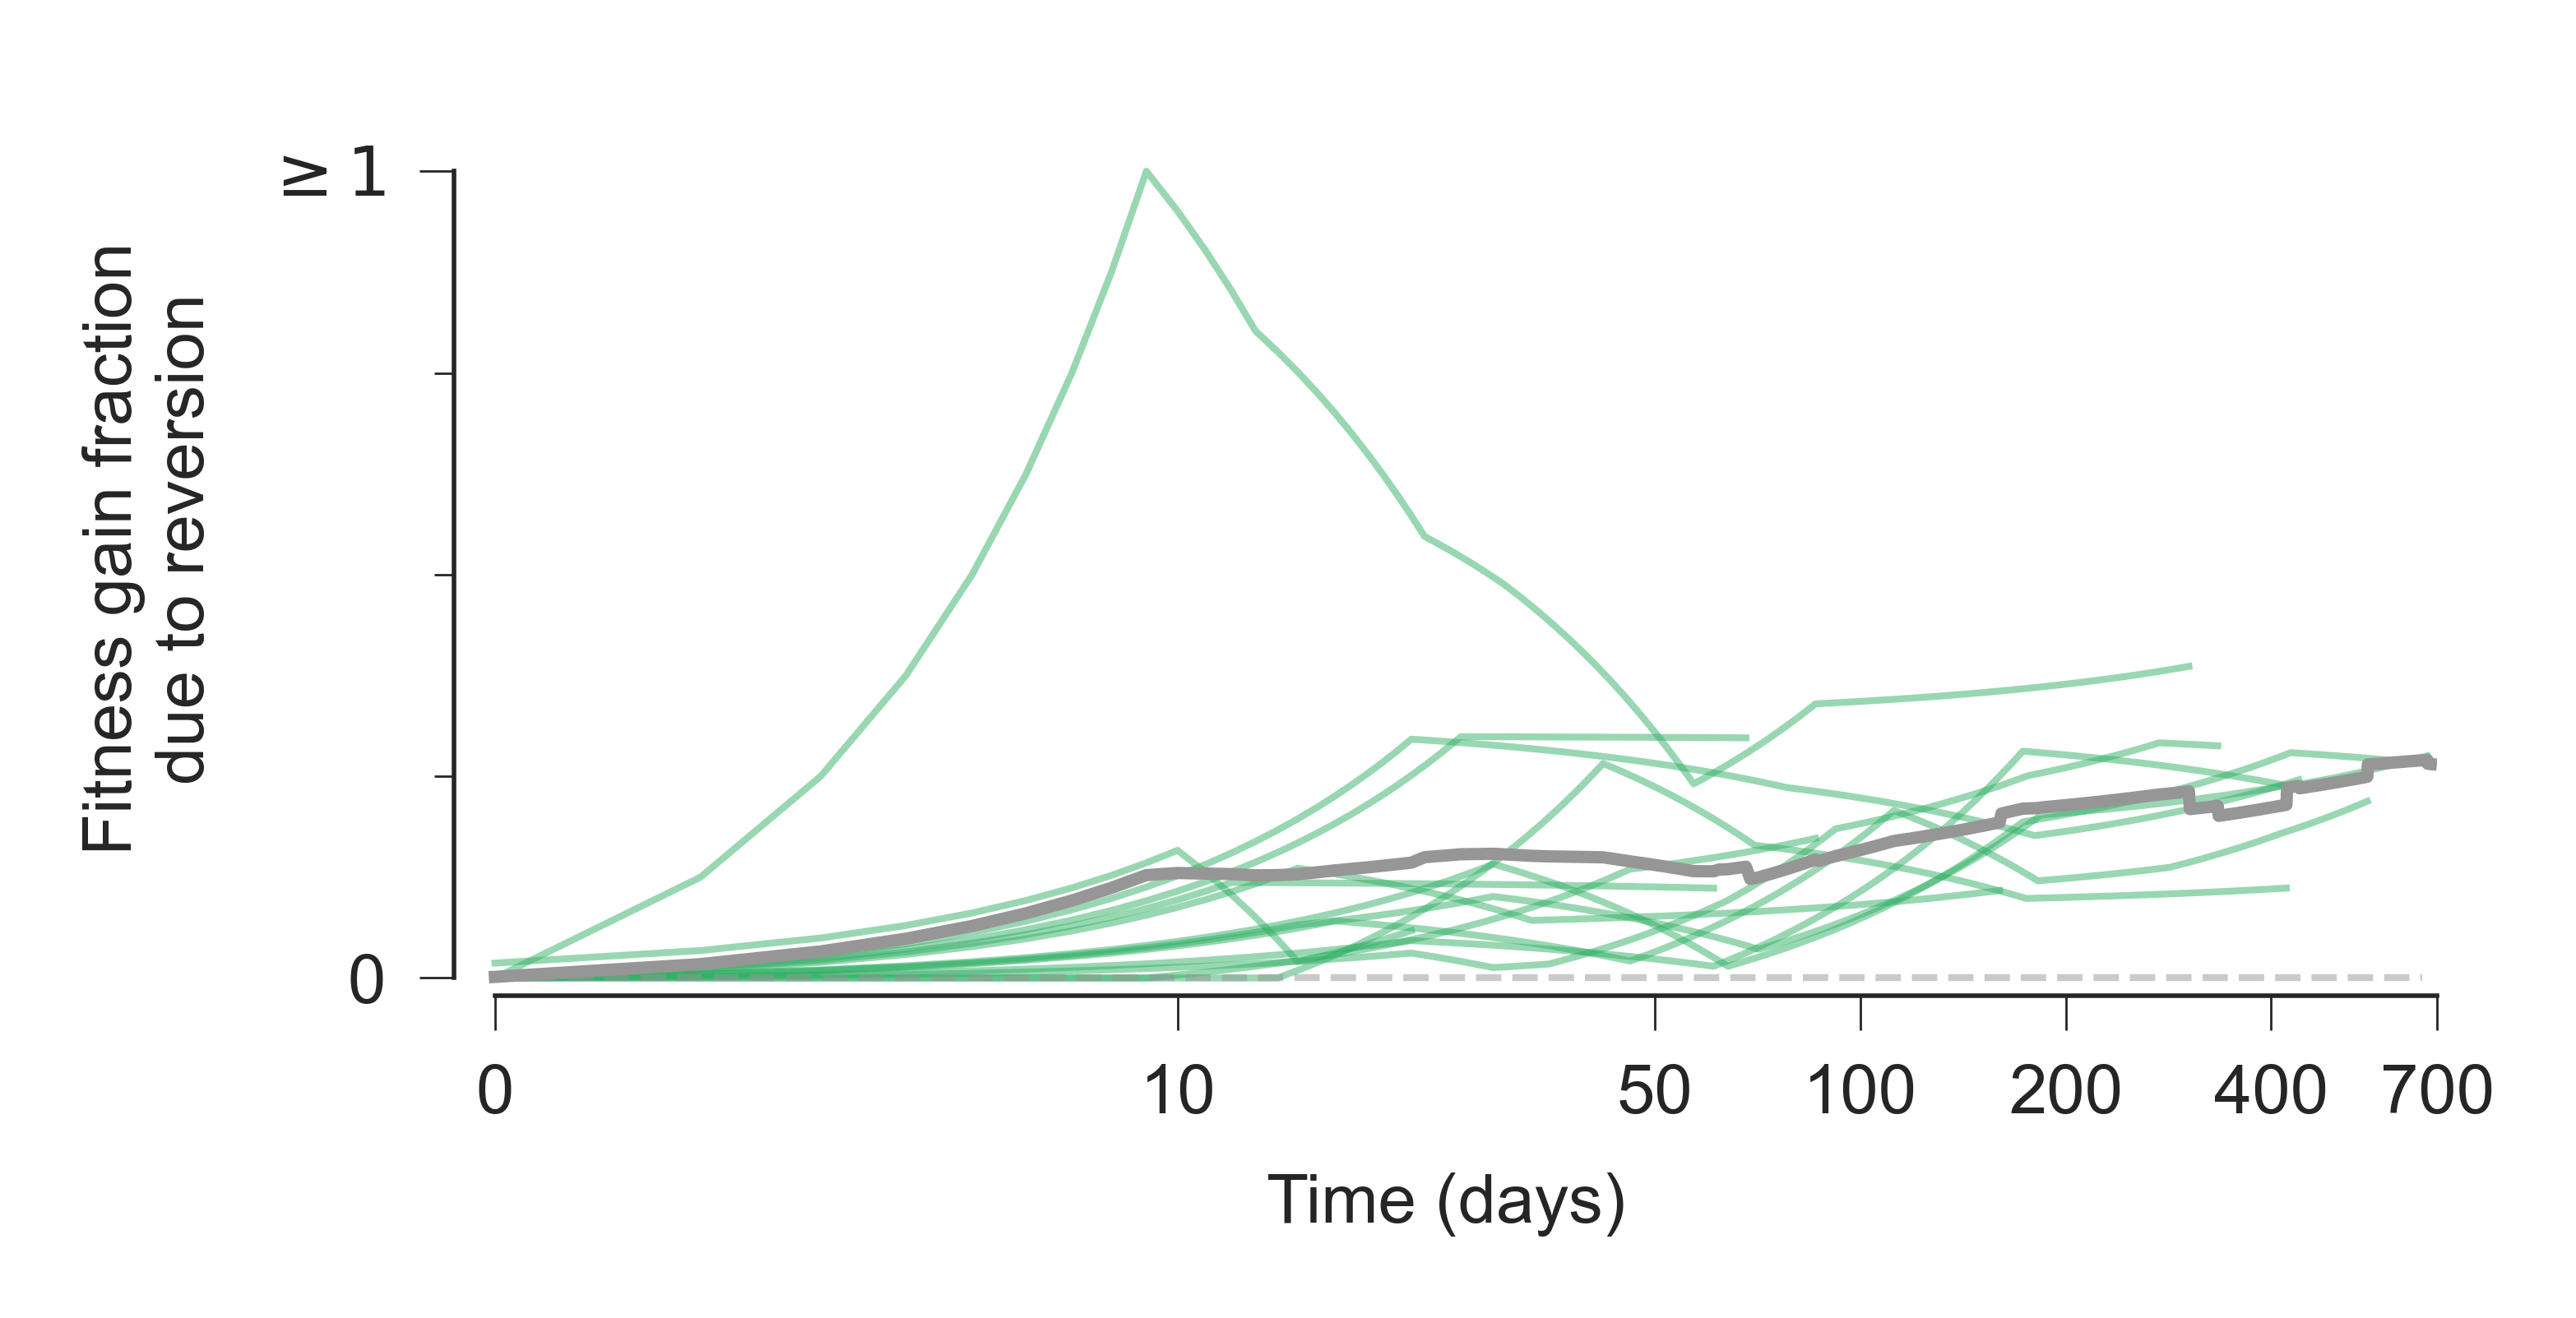

In [9]:
importlib.reload(mp)
importlib.reload(fig)

pdata = {
    'ppts':       ['700010470', '700010077', '700010058', '700010040', '700010607',
                   '706010164', '705010198', '705010185', '705010162', '704010042', 
                   '703010256', '703010159', '703010131'],
}

fig.plotReversionFaction(**pdata)
plt.show()

<a id='Figure_3'></a>
### Figure 3. CH470-3
a. allele frequency; b. polygenic coefficients

figure 4 done.


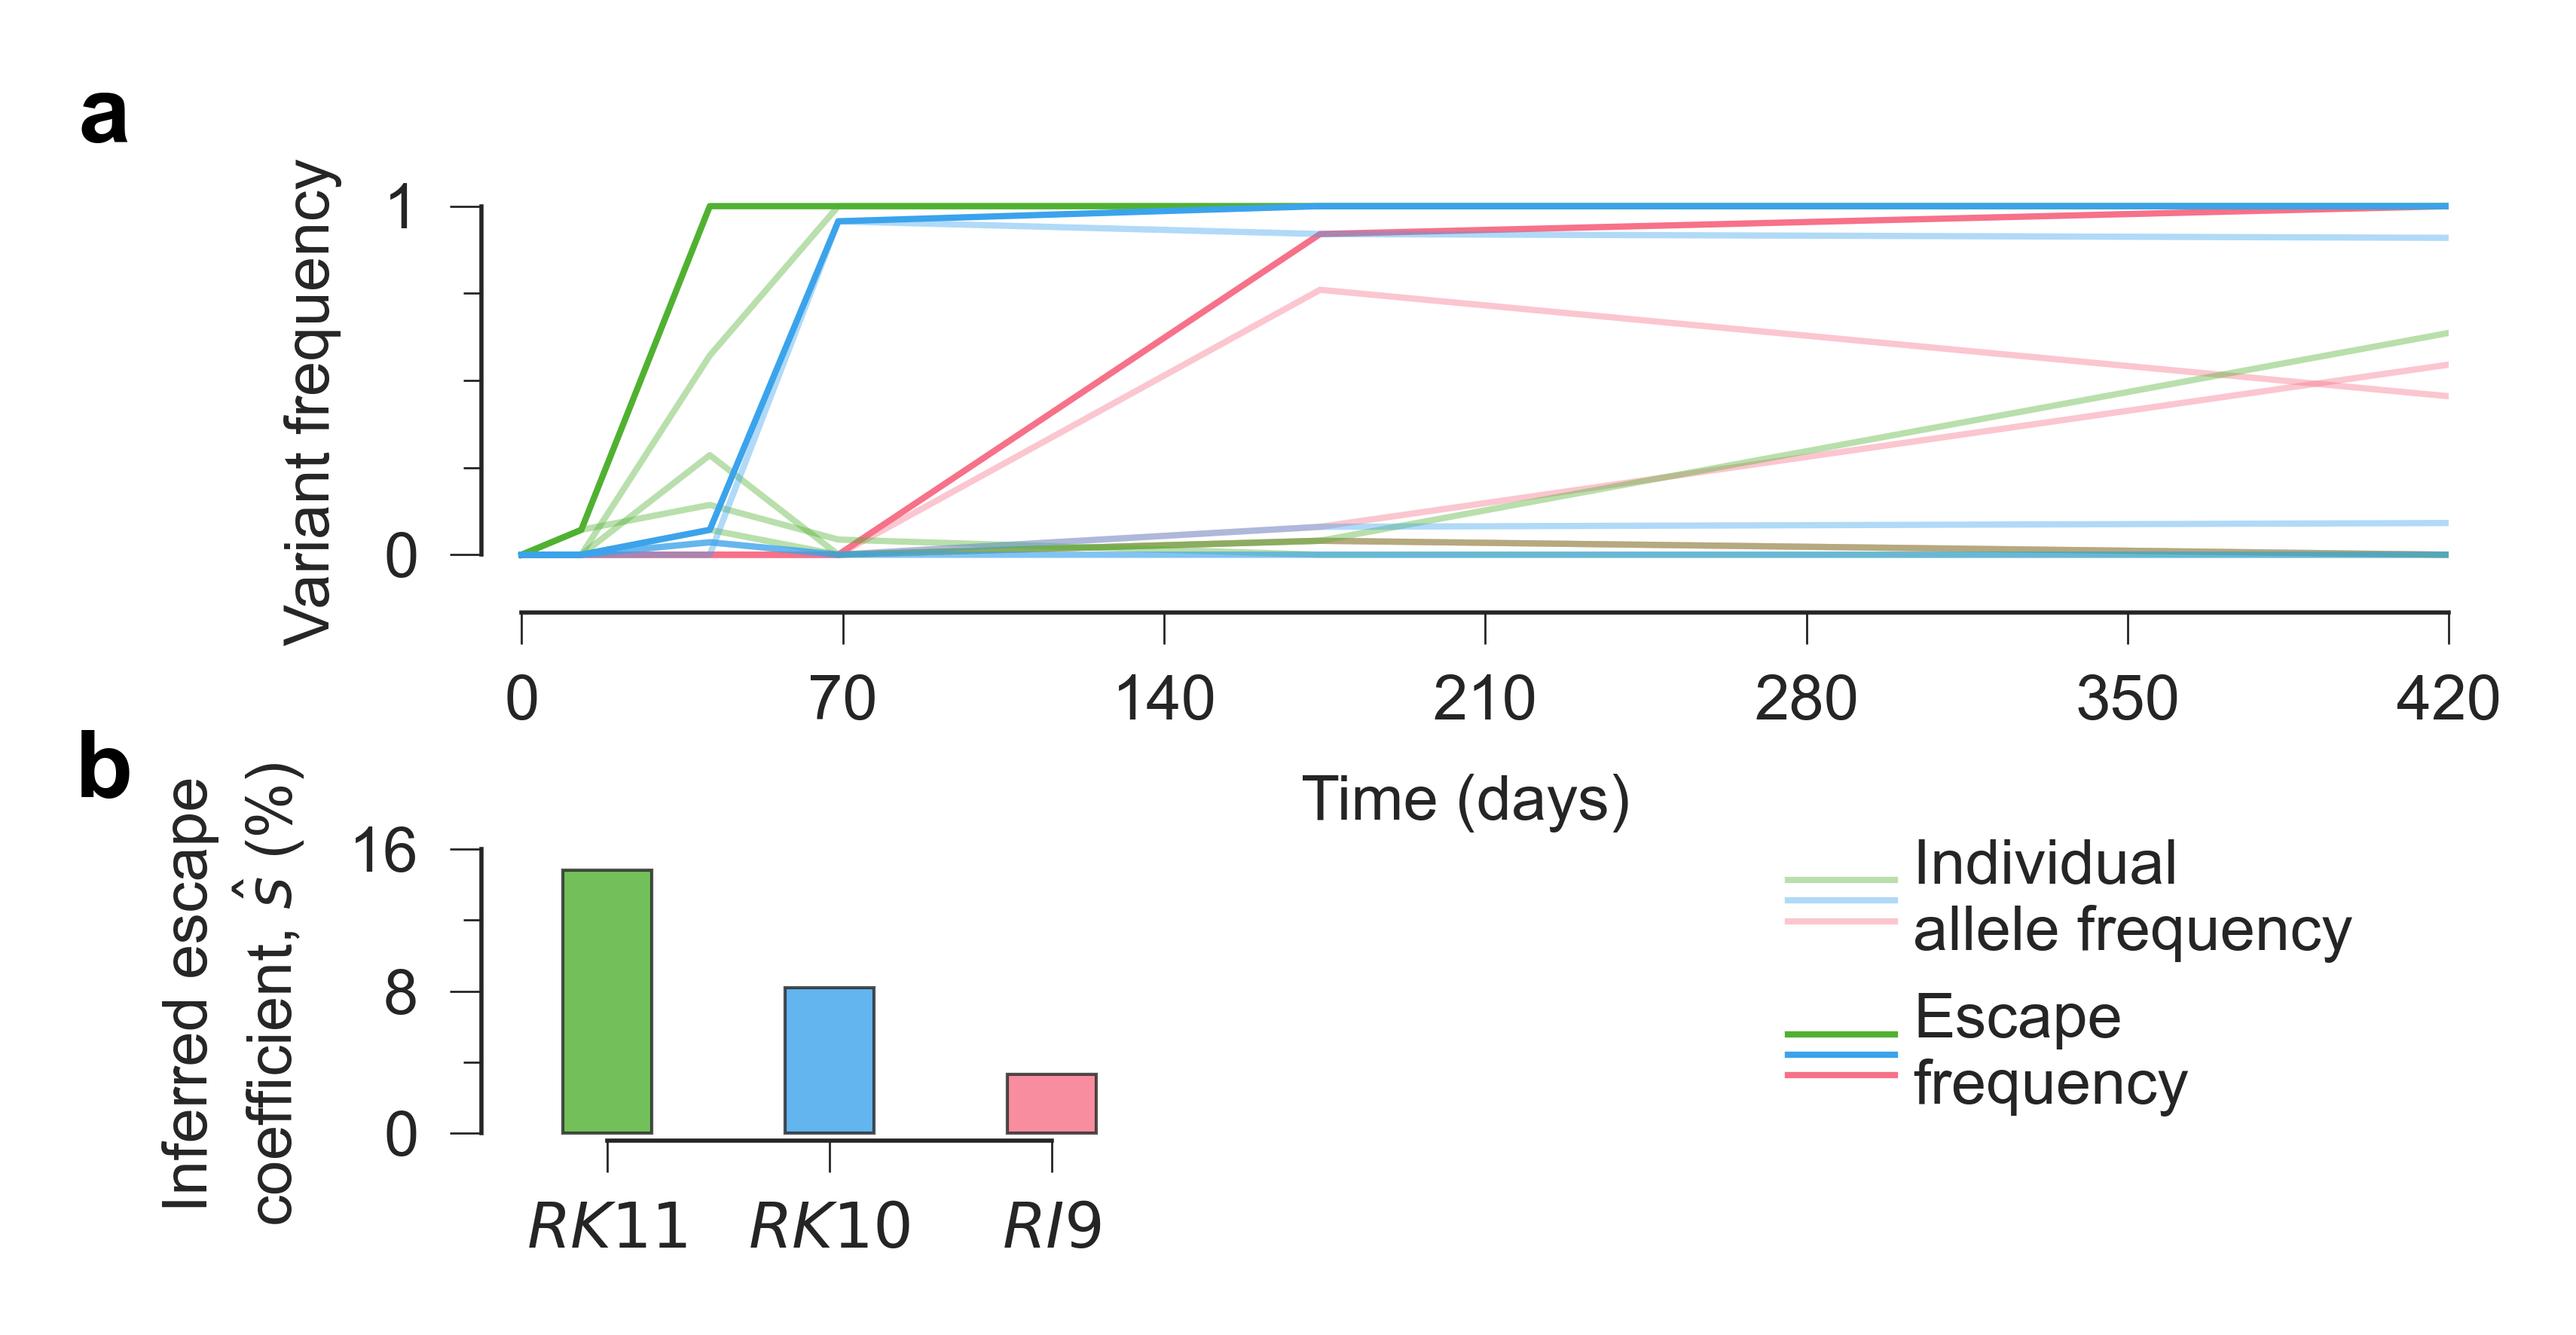

In [10]:
# patients = ['700010040', '700010058', '700010077', '700010470', '700010470', '700010607', '703010131', '703010131', '703010159', '703010256', '703010256', '704010042', '705010162', '705010162', '705010185', '705010198', '706010164']
# regions  = ['3', '3', '3', '3', '5', '3', '3', '5', '3', '3', '5', '3', '3', '5', '5', '3', '3']
# epitopes = [['AIRKAILGR', 'RACRAILHI', 'SSLAFRHVAR'], ['ERYLRDQQL'], ['DLLKTVRLI', 'TLSHVVDKL', 'QF-RNKTIVF', 'DRVIEELQR', 'DEPAAVGVG', 'KAALDLSHF'], ['RIKTWKSLVK', 'RQGLERALI', 'RLAYQHIAKEK'], ['DIKDTKEAL', 'ELYPMTSLK', 'RGRQKVVSL'], ['KRREILDLWVY'], ['EEVGFPVKPQV'], ['VKVIEEKAF'], ['PTEPVPFQL', 'REVLIWKFD'], ['EDRWNKPQK', 'RNRSIRLVN', 'LVQDWGLEL', 'QLAHRHMAR'], ['PIQLPEKDS'], ['KQRVHALFY', 'NYTDIIYRL'], ['RIRKTAPTA', 'EILDLWVYH'], ['VHKGIKVKD', 'GKEGHIAKN', 'EEMNLTGKW'], ['GTEELRSLY'], ['KAAFDLSFF'], ['NCYCKMCSY', 'SFDPIPIHY', 'EEVGFPVRPQV']]
# ticks    = [[0, 16, 45, 111, 181, 283, 412, 552],[0, 8, 45, 85],[0, 14, 32, 102, 159],[0, 13, 41, 69, 174, 420],[0, 13, 41, 69, 174, 420, 454],[0, 9, 14, 21],[0, 21, 28, 34, 63, 91, 175, 273, 333],[0, 21, 28, 34, 63, 91, 175, 273, 333],[0, 8, 12, 22, 29, 56, 85, 302],[0, 28, 63, 172, 426, 684],[0, 28, 63, 172, 426, 684],[0, 21, 60, 172, 424, 676],[0, 21, 77, 179, 438],[0, 21, 77, 179, 438],[0, 25, 67],[0, 11, 60],[0, 14, 28, 70, 183, 434]]


# for i in range(len(ticks)):
#     pdata['patient']    = patients[i]
#     pdata['region']     = regions[i]
#     pdata['epitope']    = epitopes[i]
#     pdata['traj_ticks'] = ticks[i]
#     fig.plot_figure_4(**pdata)
#     plt.close()

import re

importlib.reload(mp)
importlib.reload(fig)

pdata = {
    'patient':       '700010470',
    'region' :       '3',
    'epitope':       ['RQGLERALI','RLAYQHIAKEK','RIKTWKSLVK'],
    'traj_ticks':    [0, 70, 140, 210, 280, 350, 420],   
}

fig.plot_figure_4(**pdata)
plt.show()

<a id='Figure_4'></a>
### Figure 4. CH131-3
a. allele frequencies and polygenic frequencies; bc. selection coefficients for all variants in epitope

figure 5 done.


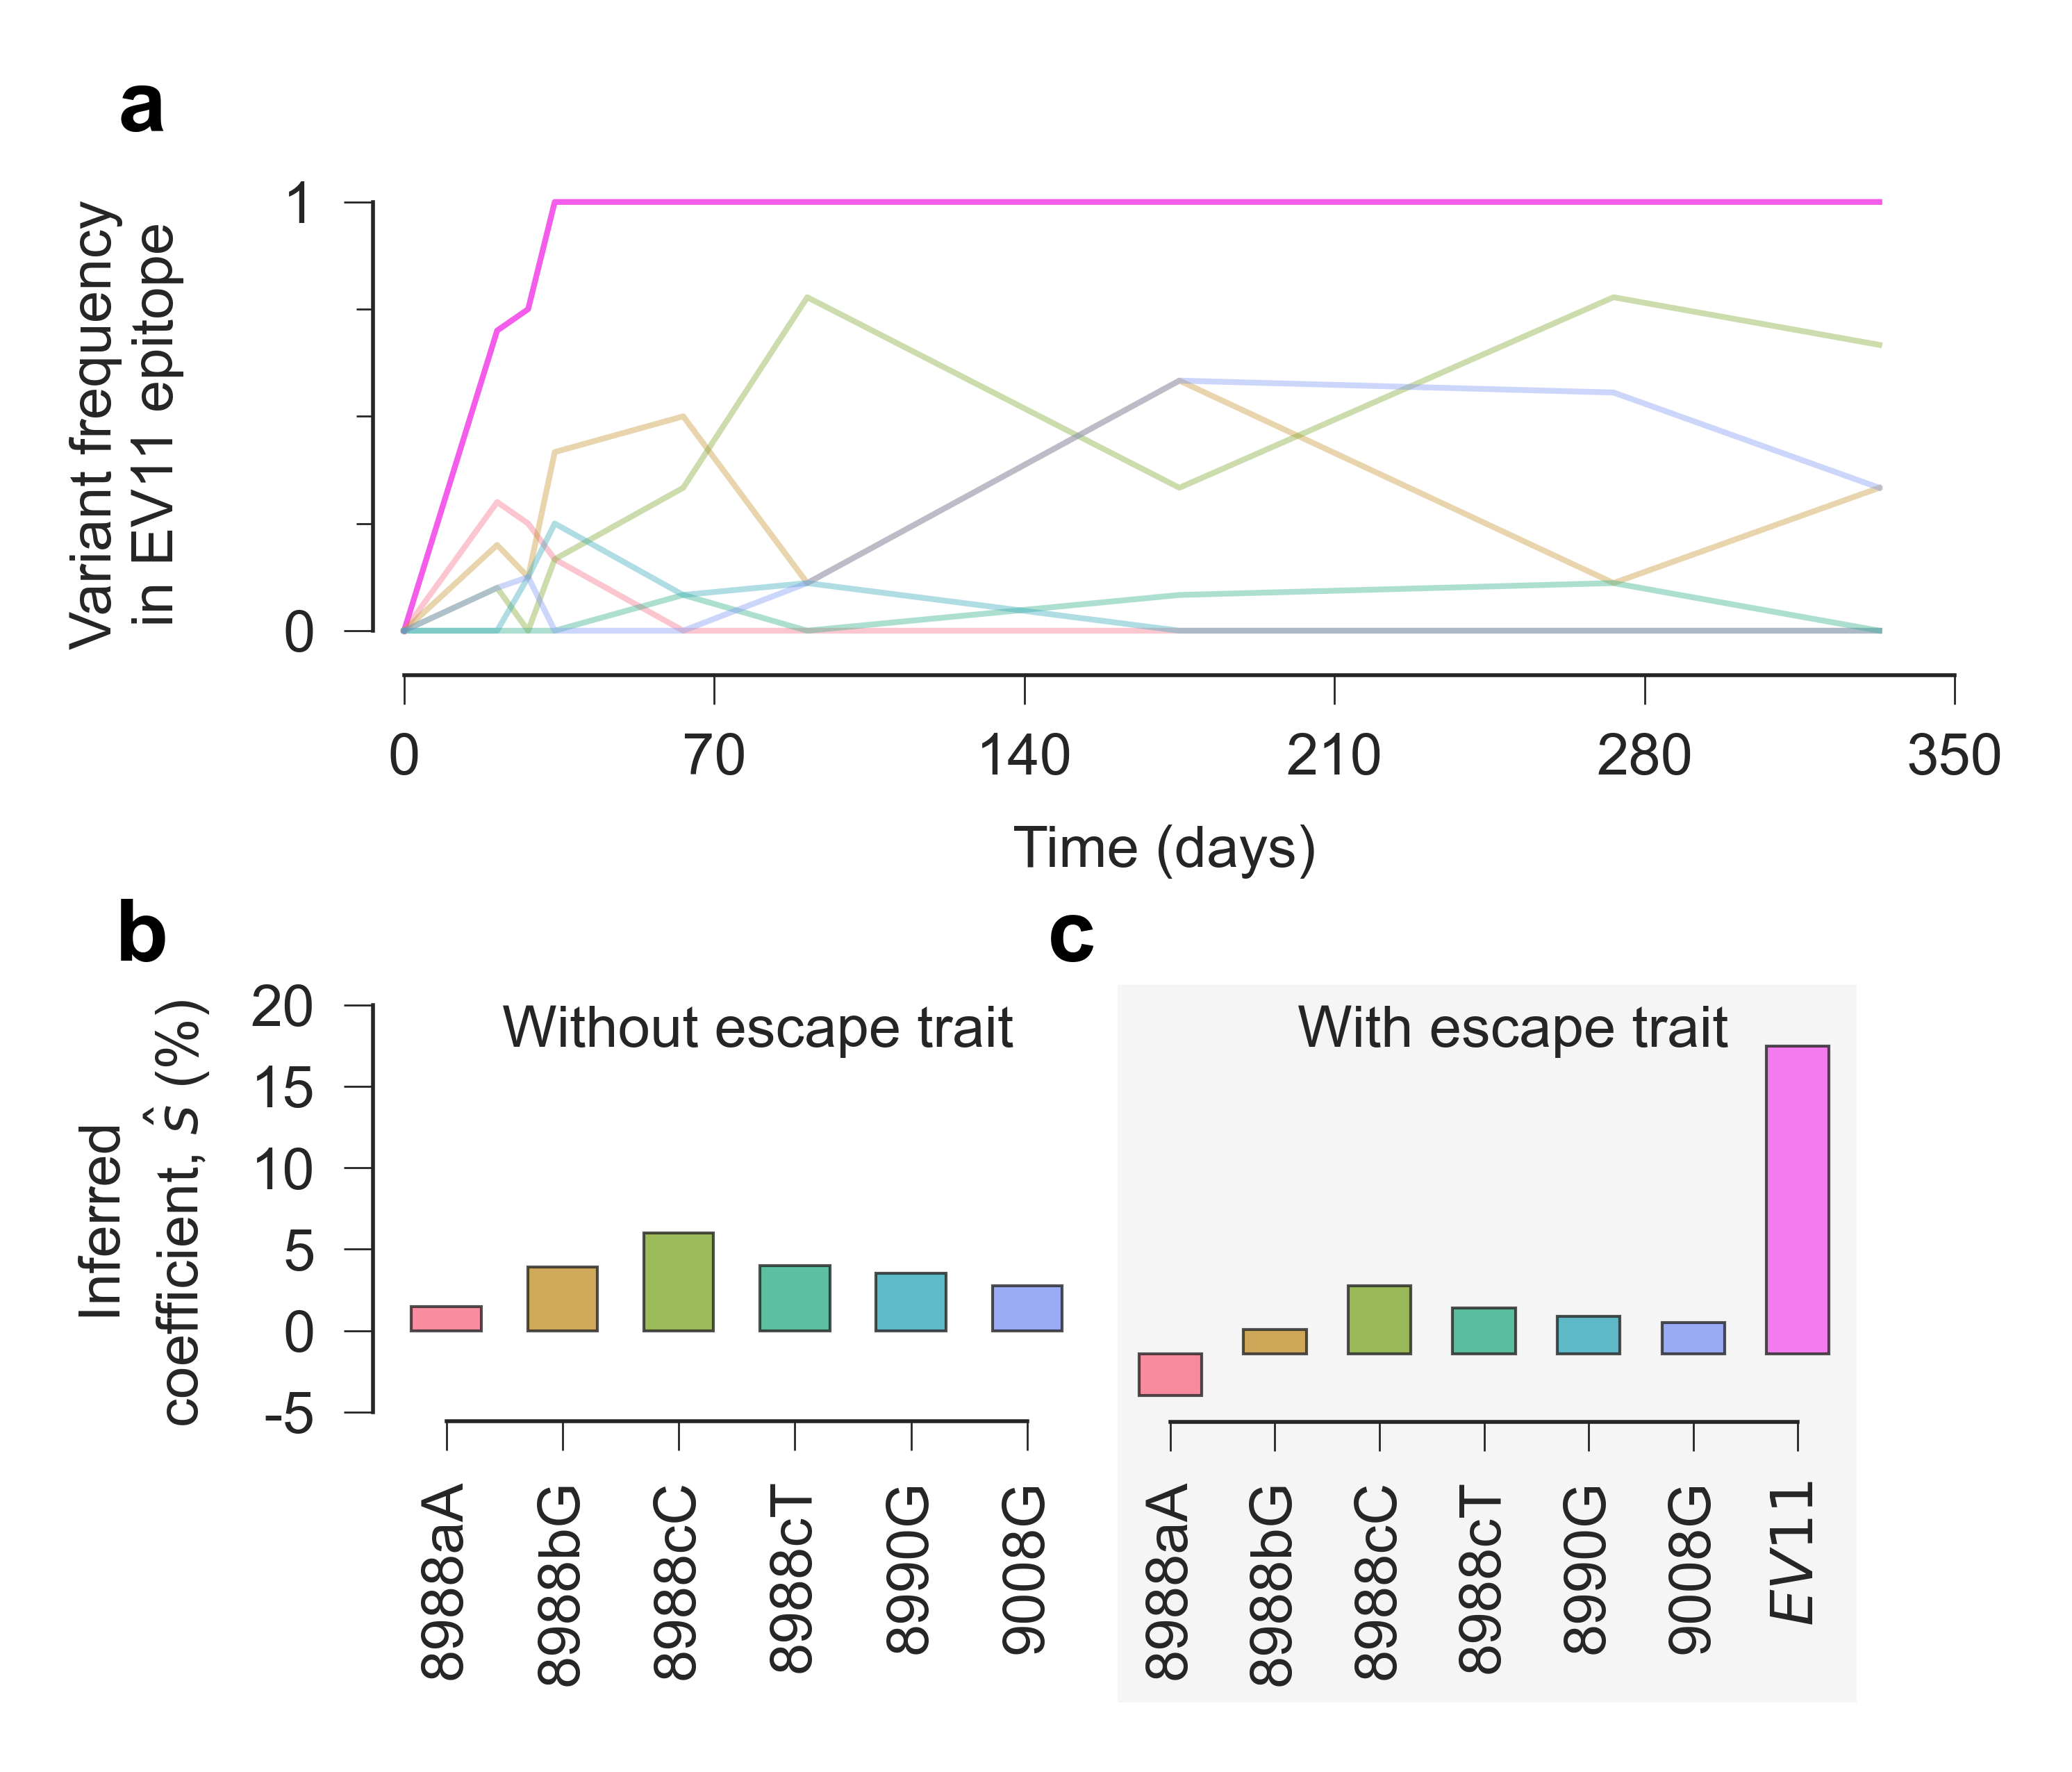

In [11]:
importlib.reload(mp)
importlib.reload(fig)

pdata = {
    'patient':       '703010131',
    'region' :       '3',
    'epitope':       ['EEVGFPVKPQV'],
    'traj_ticks':    [0, 70, 140, 210, 280, 350],   
}

fig.plot_figure_5(**pdata)

<a id='Figure_5'></a>
### Figure 5.  CH470-5
a. selection coefficients with vs. without polygenic terms
b. allele frequncies for  relative mutant variants
c. heatmap for sij

figure 6 done.


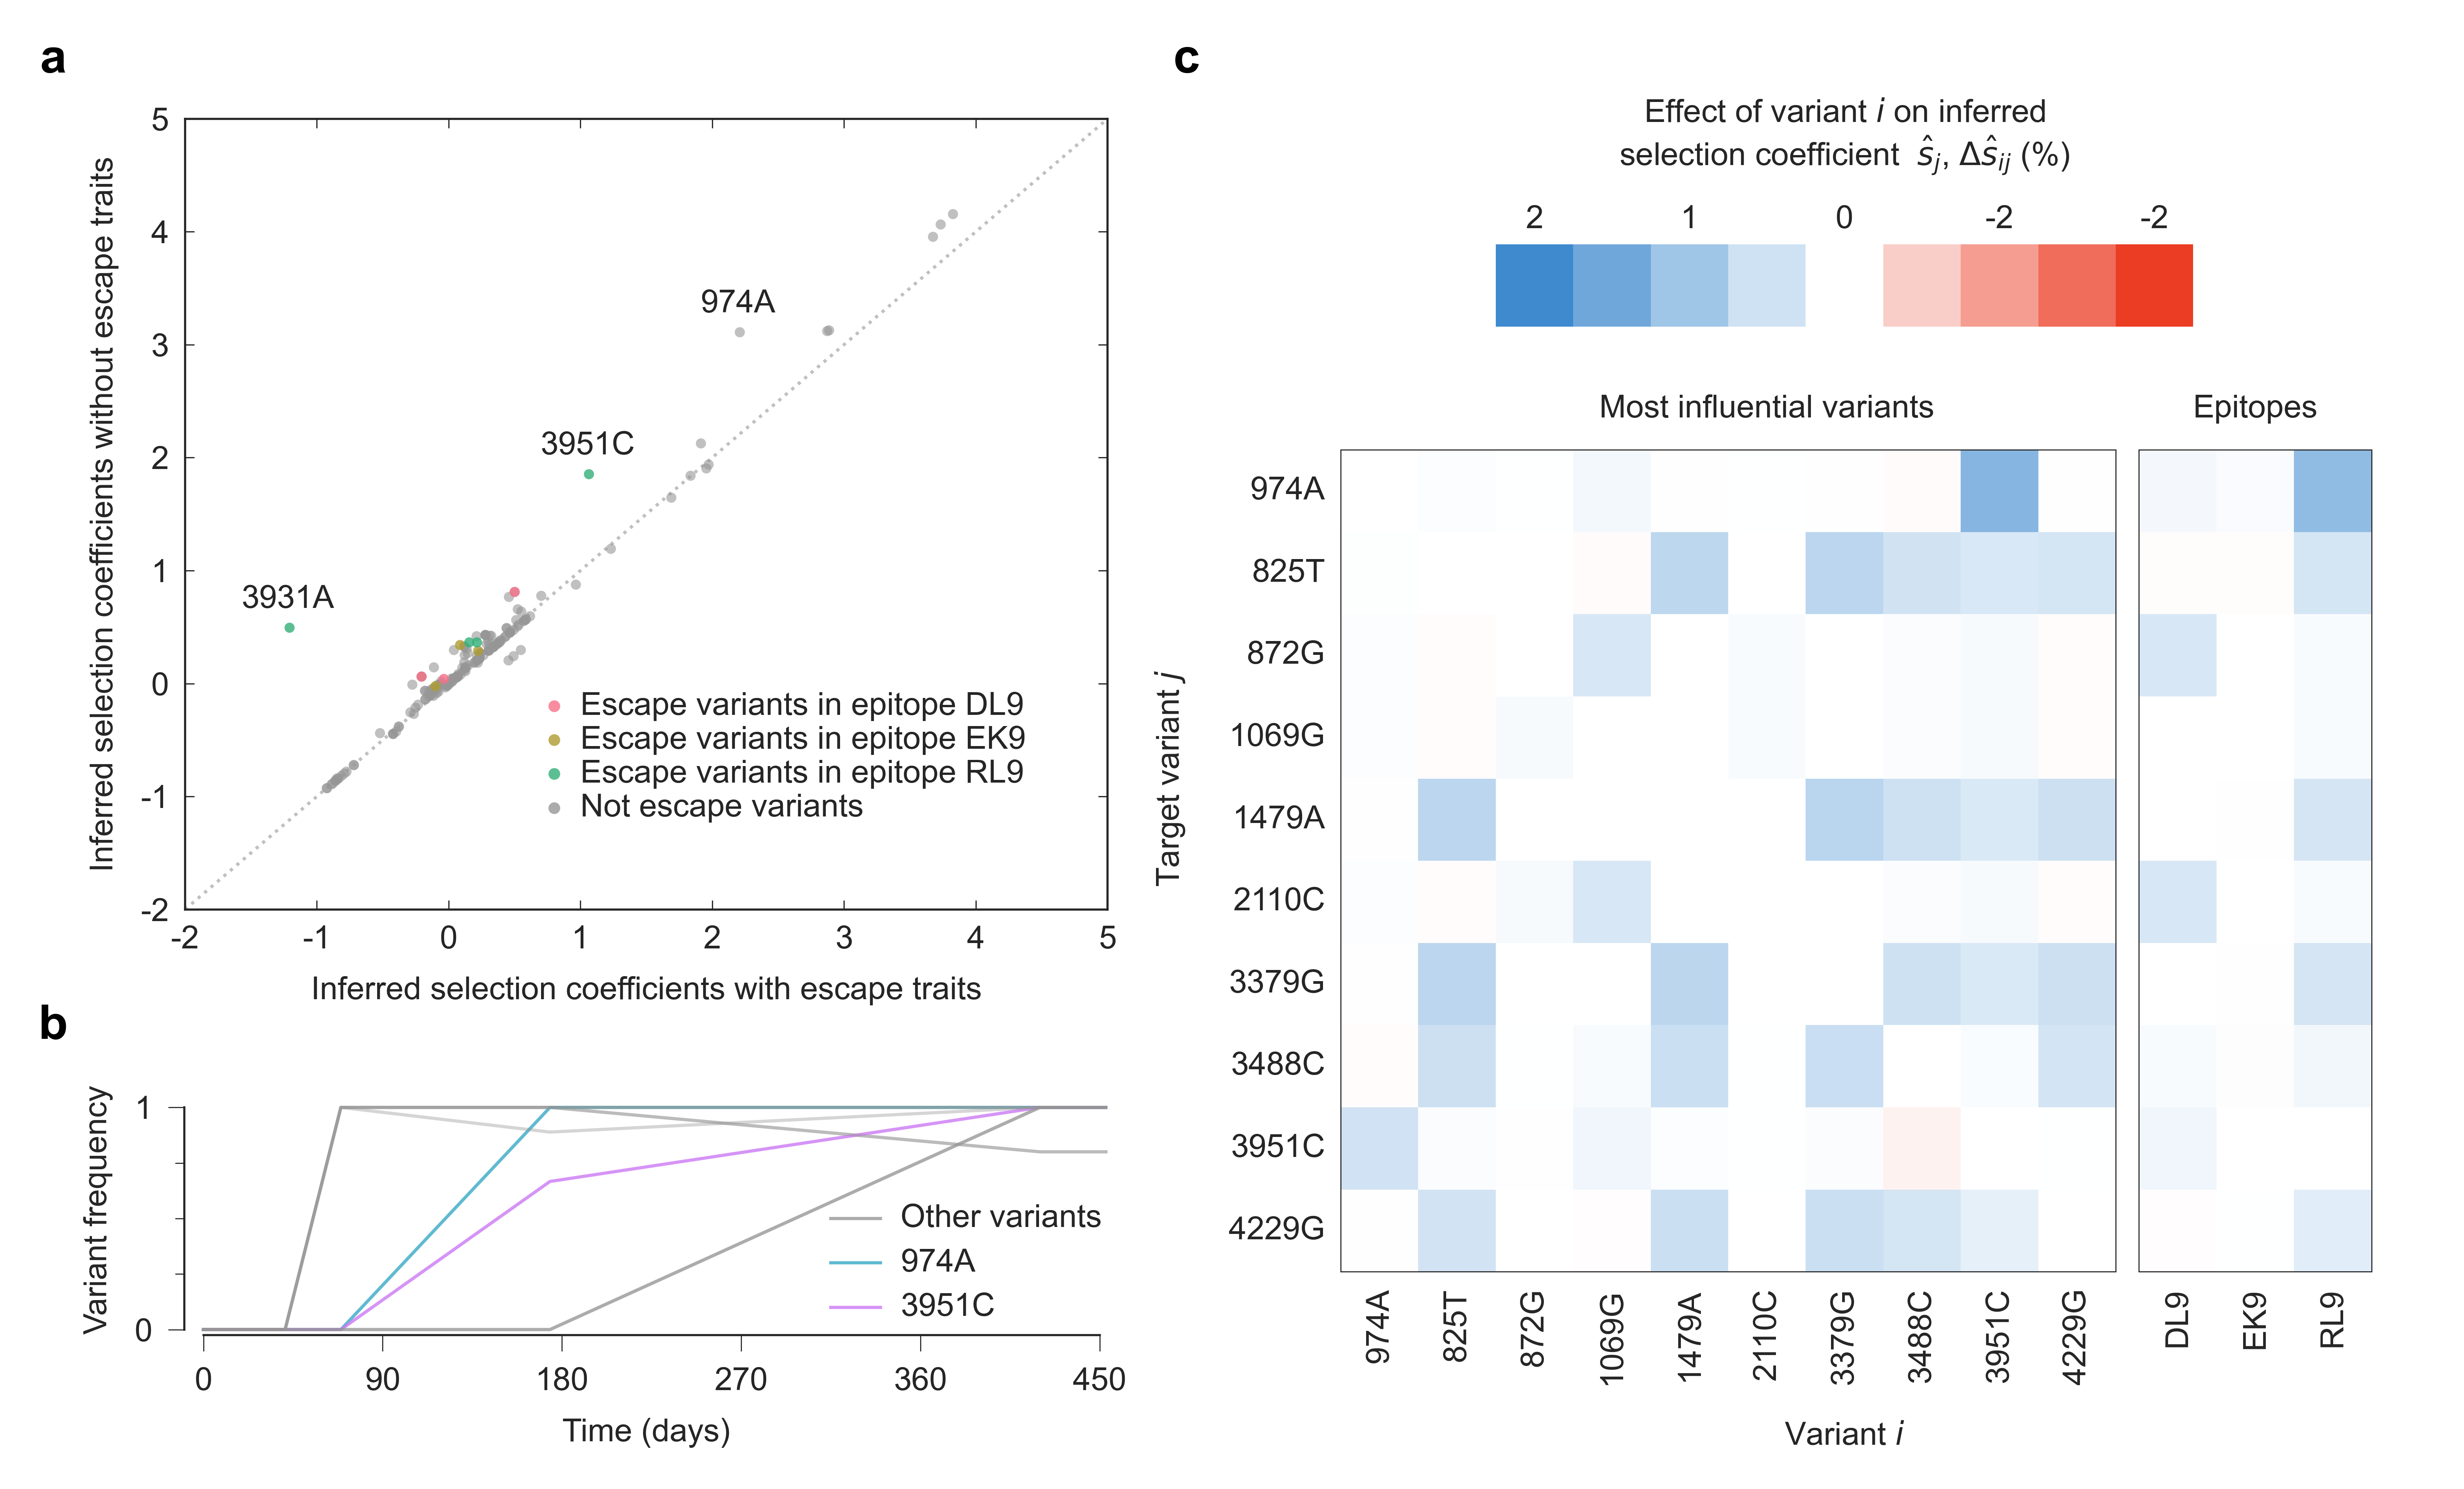

In [12]:
importlib.reload(mp)
importlib.reload(fig)

pdata = {
    'patient':       '700010470',
    'region' :       '5',
    'epitope':       ['DIKDTKEAL','ELYPMTSLK','RGRQKVVSL'],
    'traj_ticks':    [0, 90,180,270,360,450], 
    'variants':      ['17_A','3_T','9_G','23_G','37_A','55_C','124_G','130_C','152_C','168_G'],
    'high_var':      [17,152],
    'note_var':      ['17_A','149_A','152_C'],
    'seq_length':    192,
}


fig.plot_figure_6(**pdata)

<a id='su:Figure_6'></a>
### Supplementary figure 6. Fitness gain due to reversion mutations, escape mutations and the sum of them

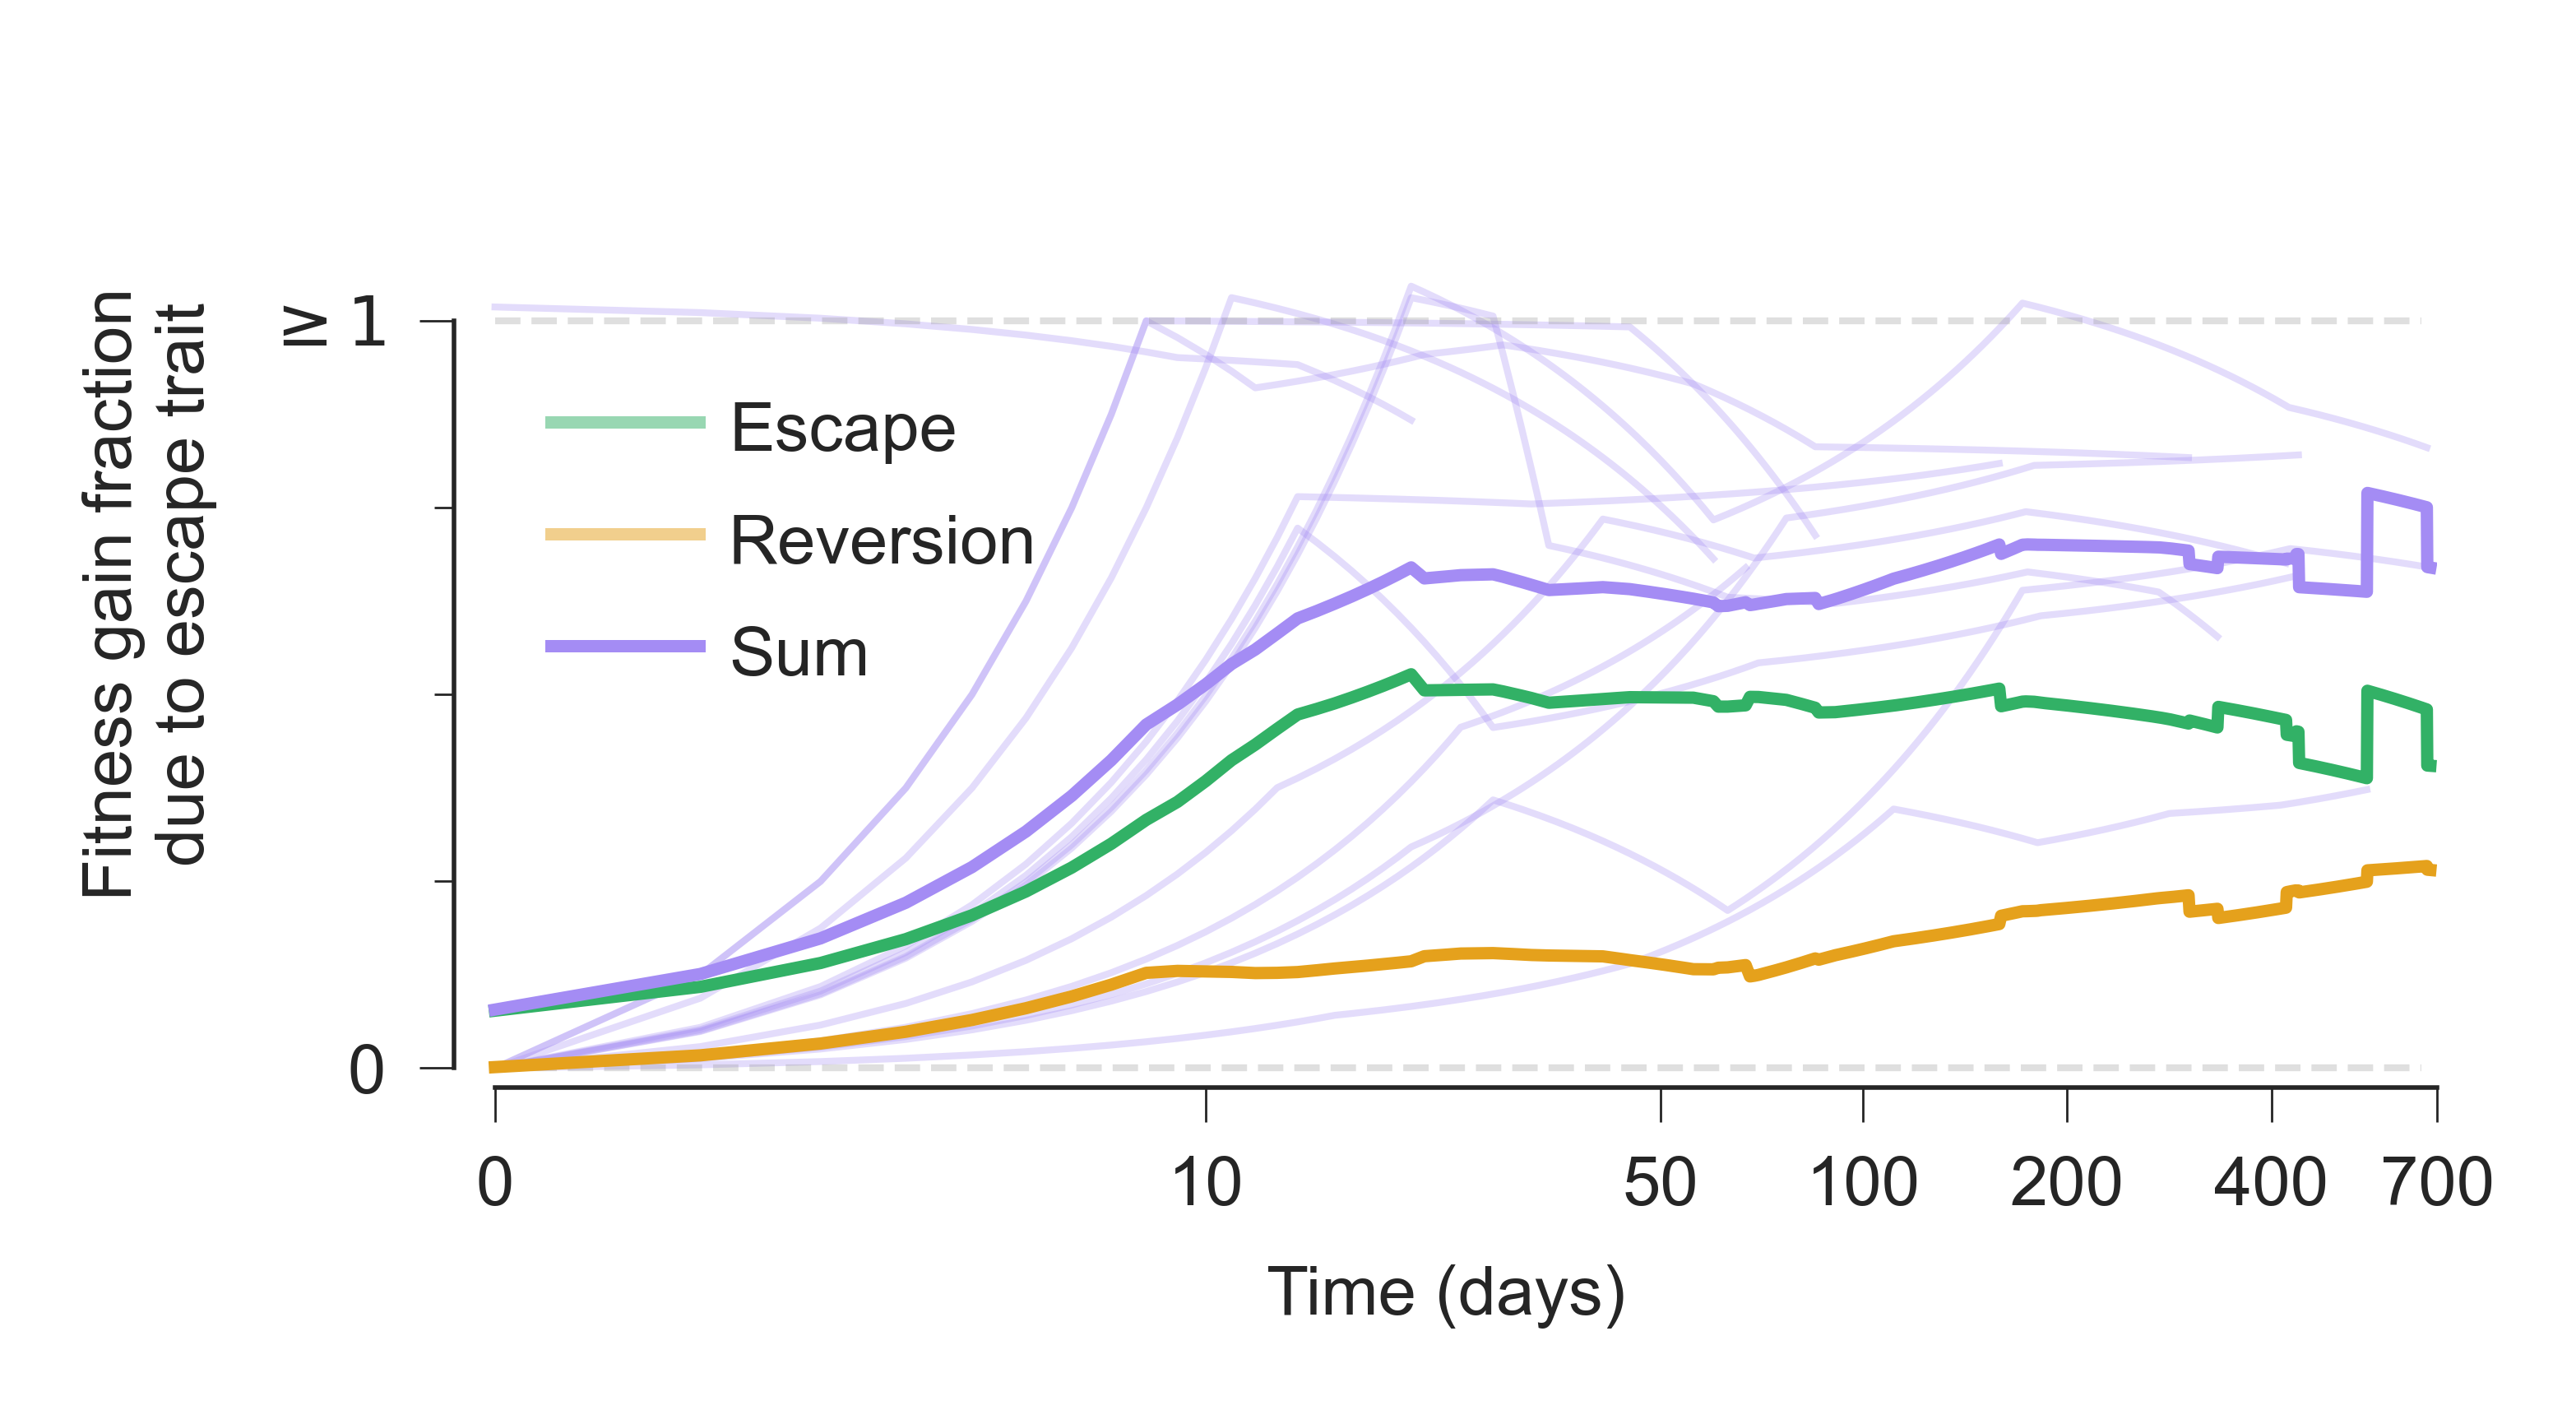

In [13]:
importlib.reload(mp)
importlib.reload(fig)
pdata = {
    'ppts':       ['700010470', '700010077', '700010058', '700010040', '700010607',
                   '706010164', '705010198', '705010185', '705010162', '704010042', 
                   '703010256', '703010159', '703010131'],
}
fig.plot_sum_fraction(**pdata)
plt.show()

<a id='su:Figure_7'></a>
### Supplementary Figure 7. One special case for fitness gain due to reversion mutation
Fitness due to reversion (CH042)

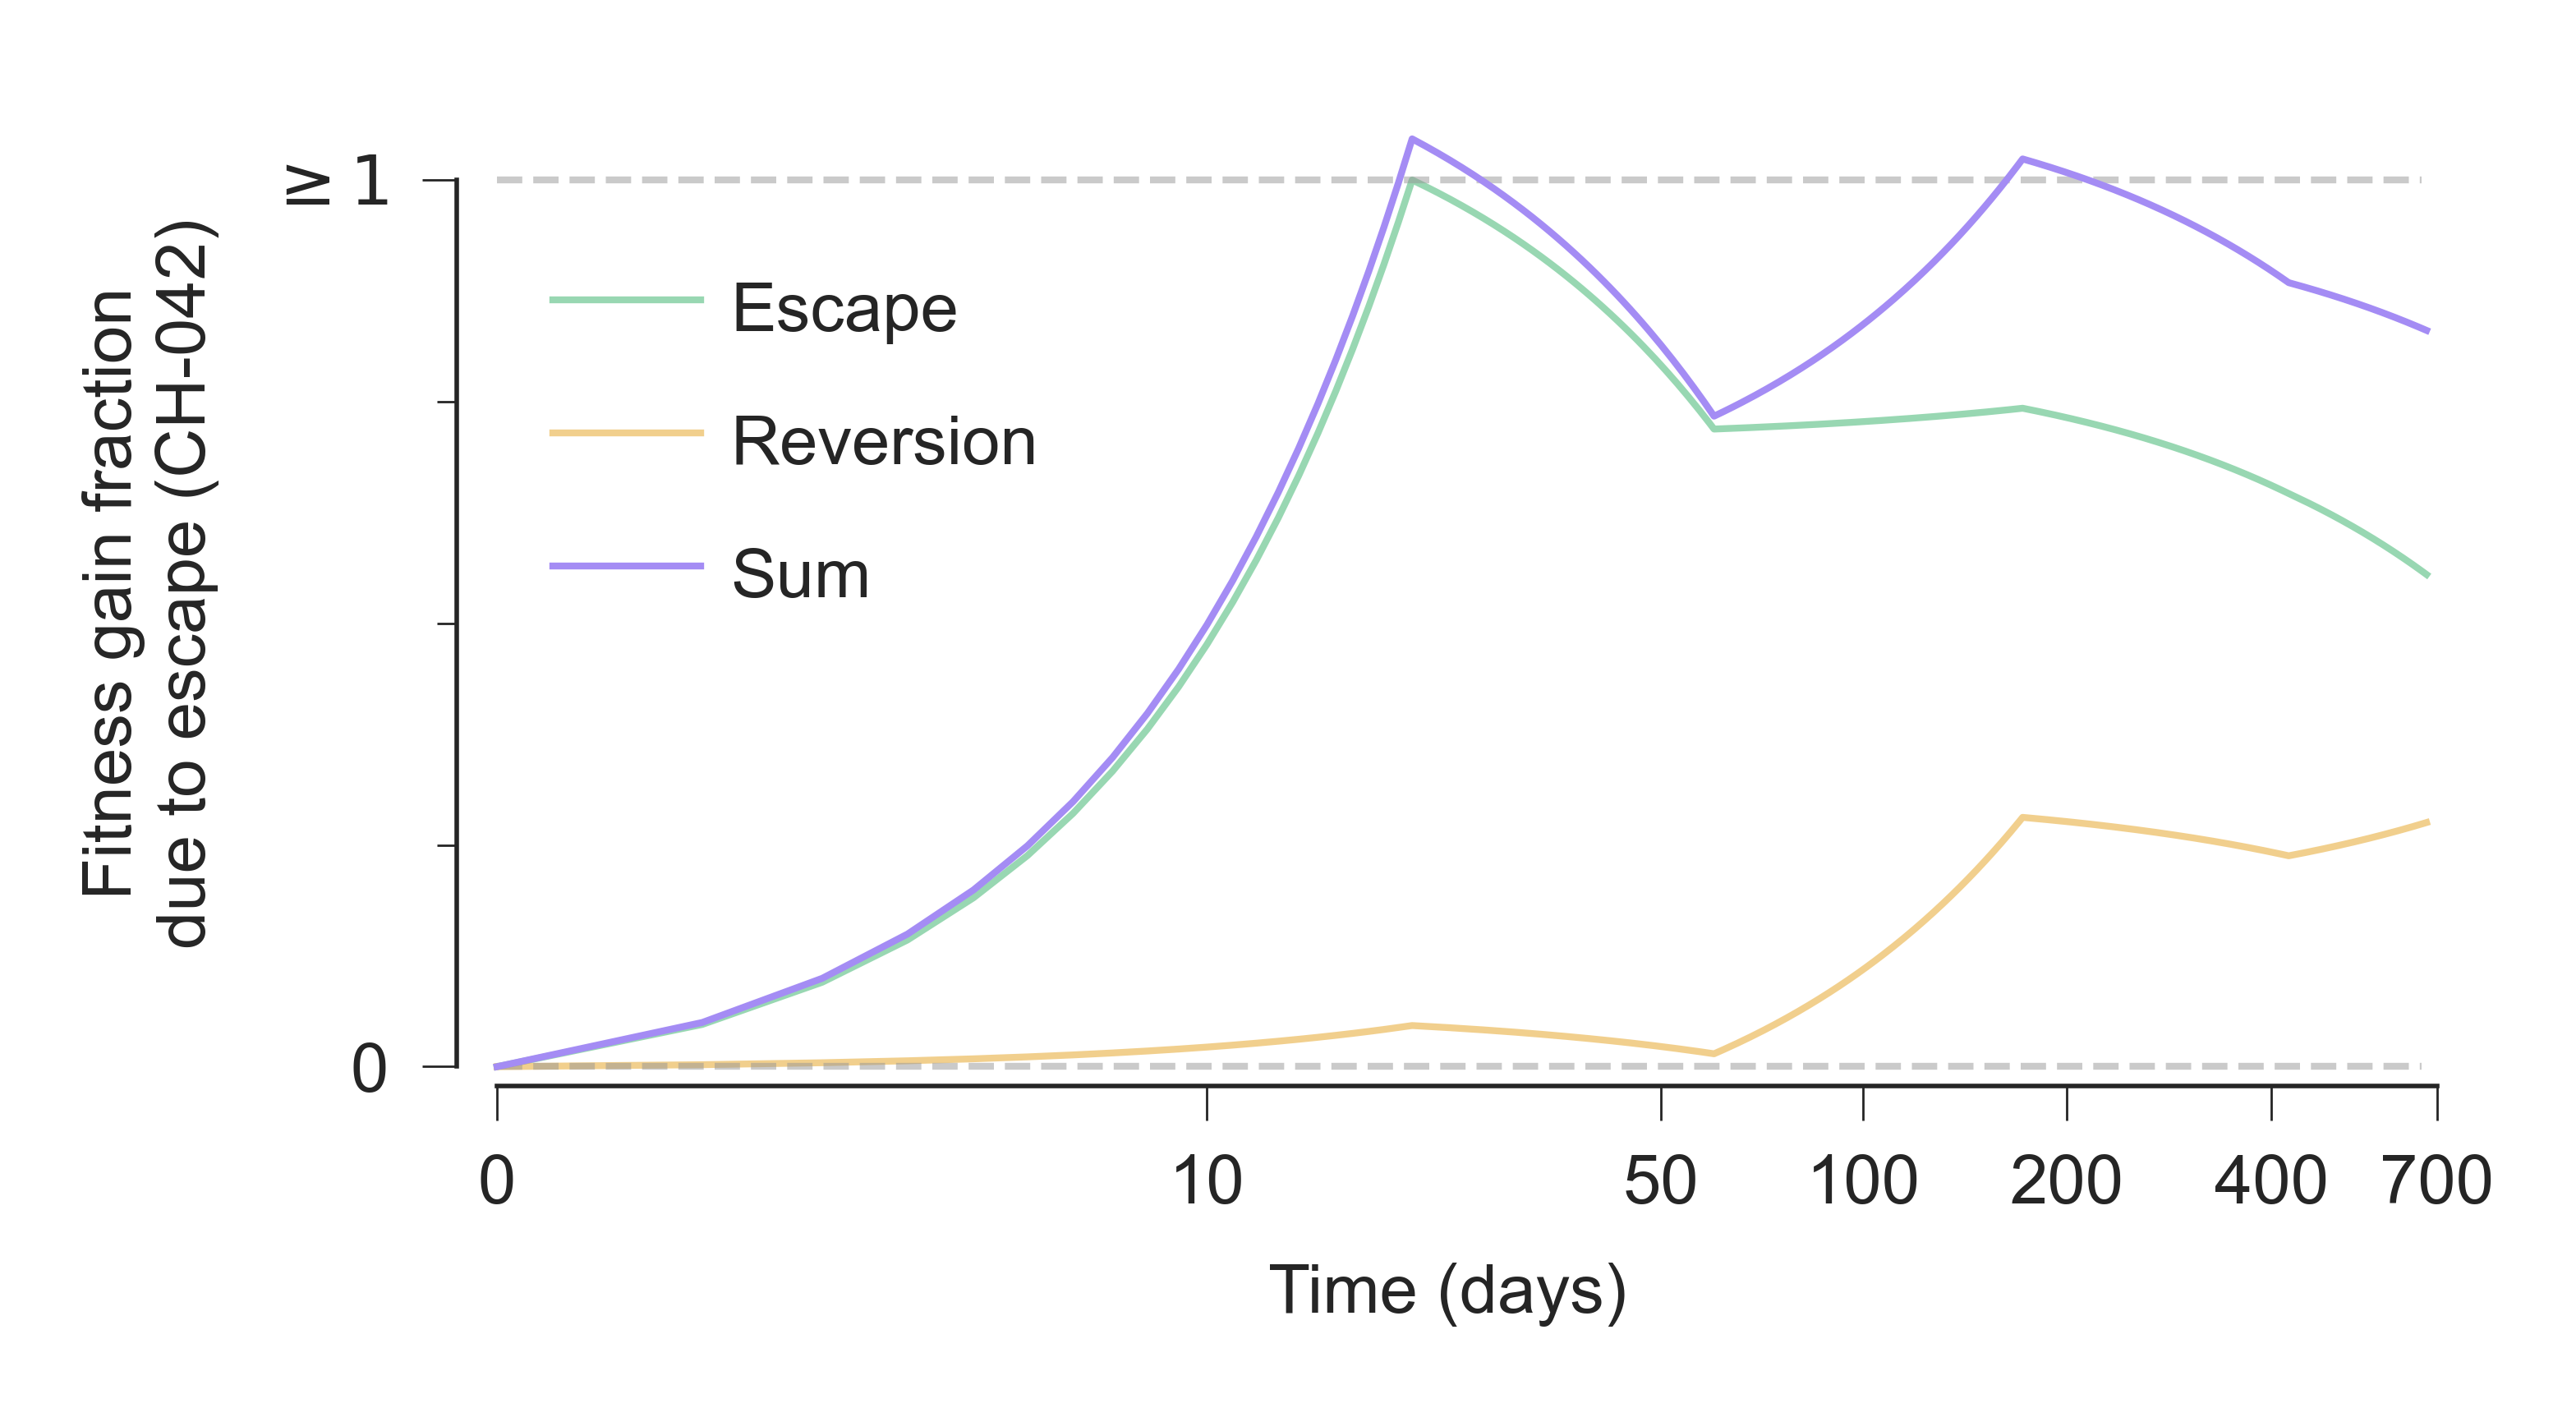

In [14]:
importlib.reload(mp)
importlib.reload(fig)

# ppts = ['700010470', '700010077', '700010058', '700010040', '700010607','706010164', '705010198', 
#         '705010185', '705010162', '704010042', '703010256', '703010159', '703010131']

# 704010042,
pdata = { 'ppt':       '704010042', }
fig.plot_single_fraction(**pdata)
plt.show()

# for ppt in ppts:
#     pdata['ppt'] = ppt
#     fig.plot_single_fraction(**pdata)
#     plt.show()

<a id='su:Figure_8'></a>
### Supplementary Figure 8. Distribution of all mutations and reversion mutations

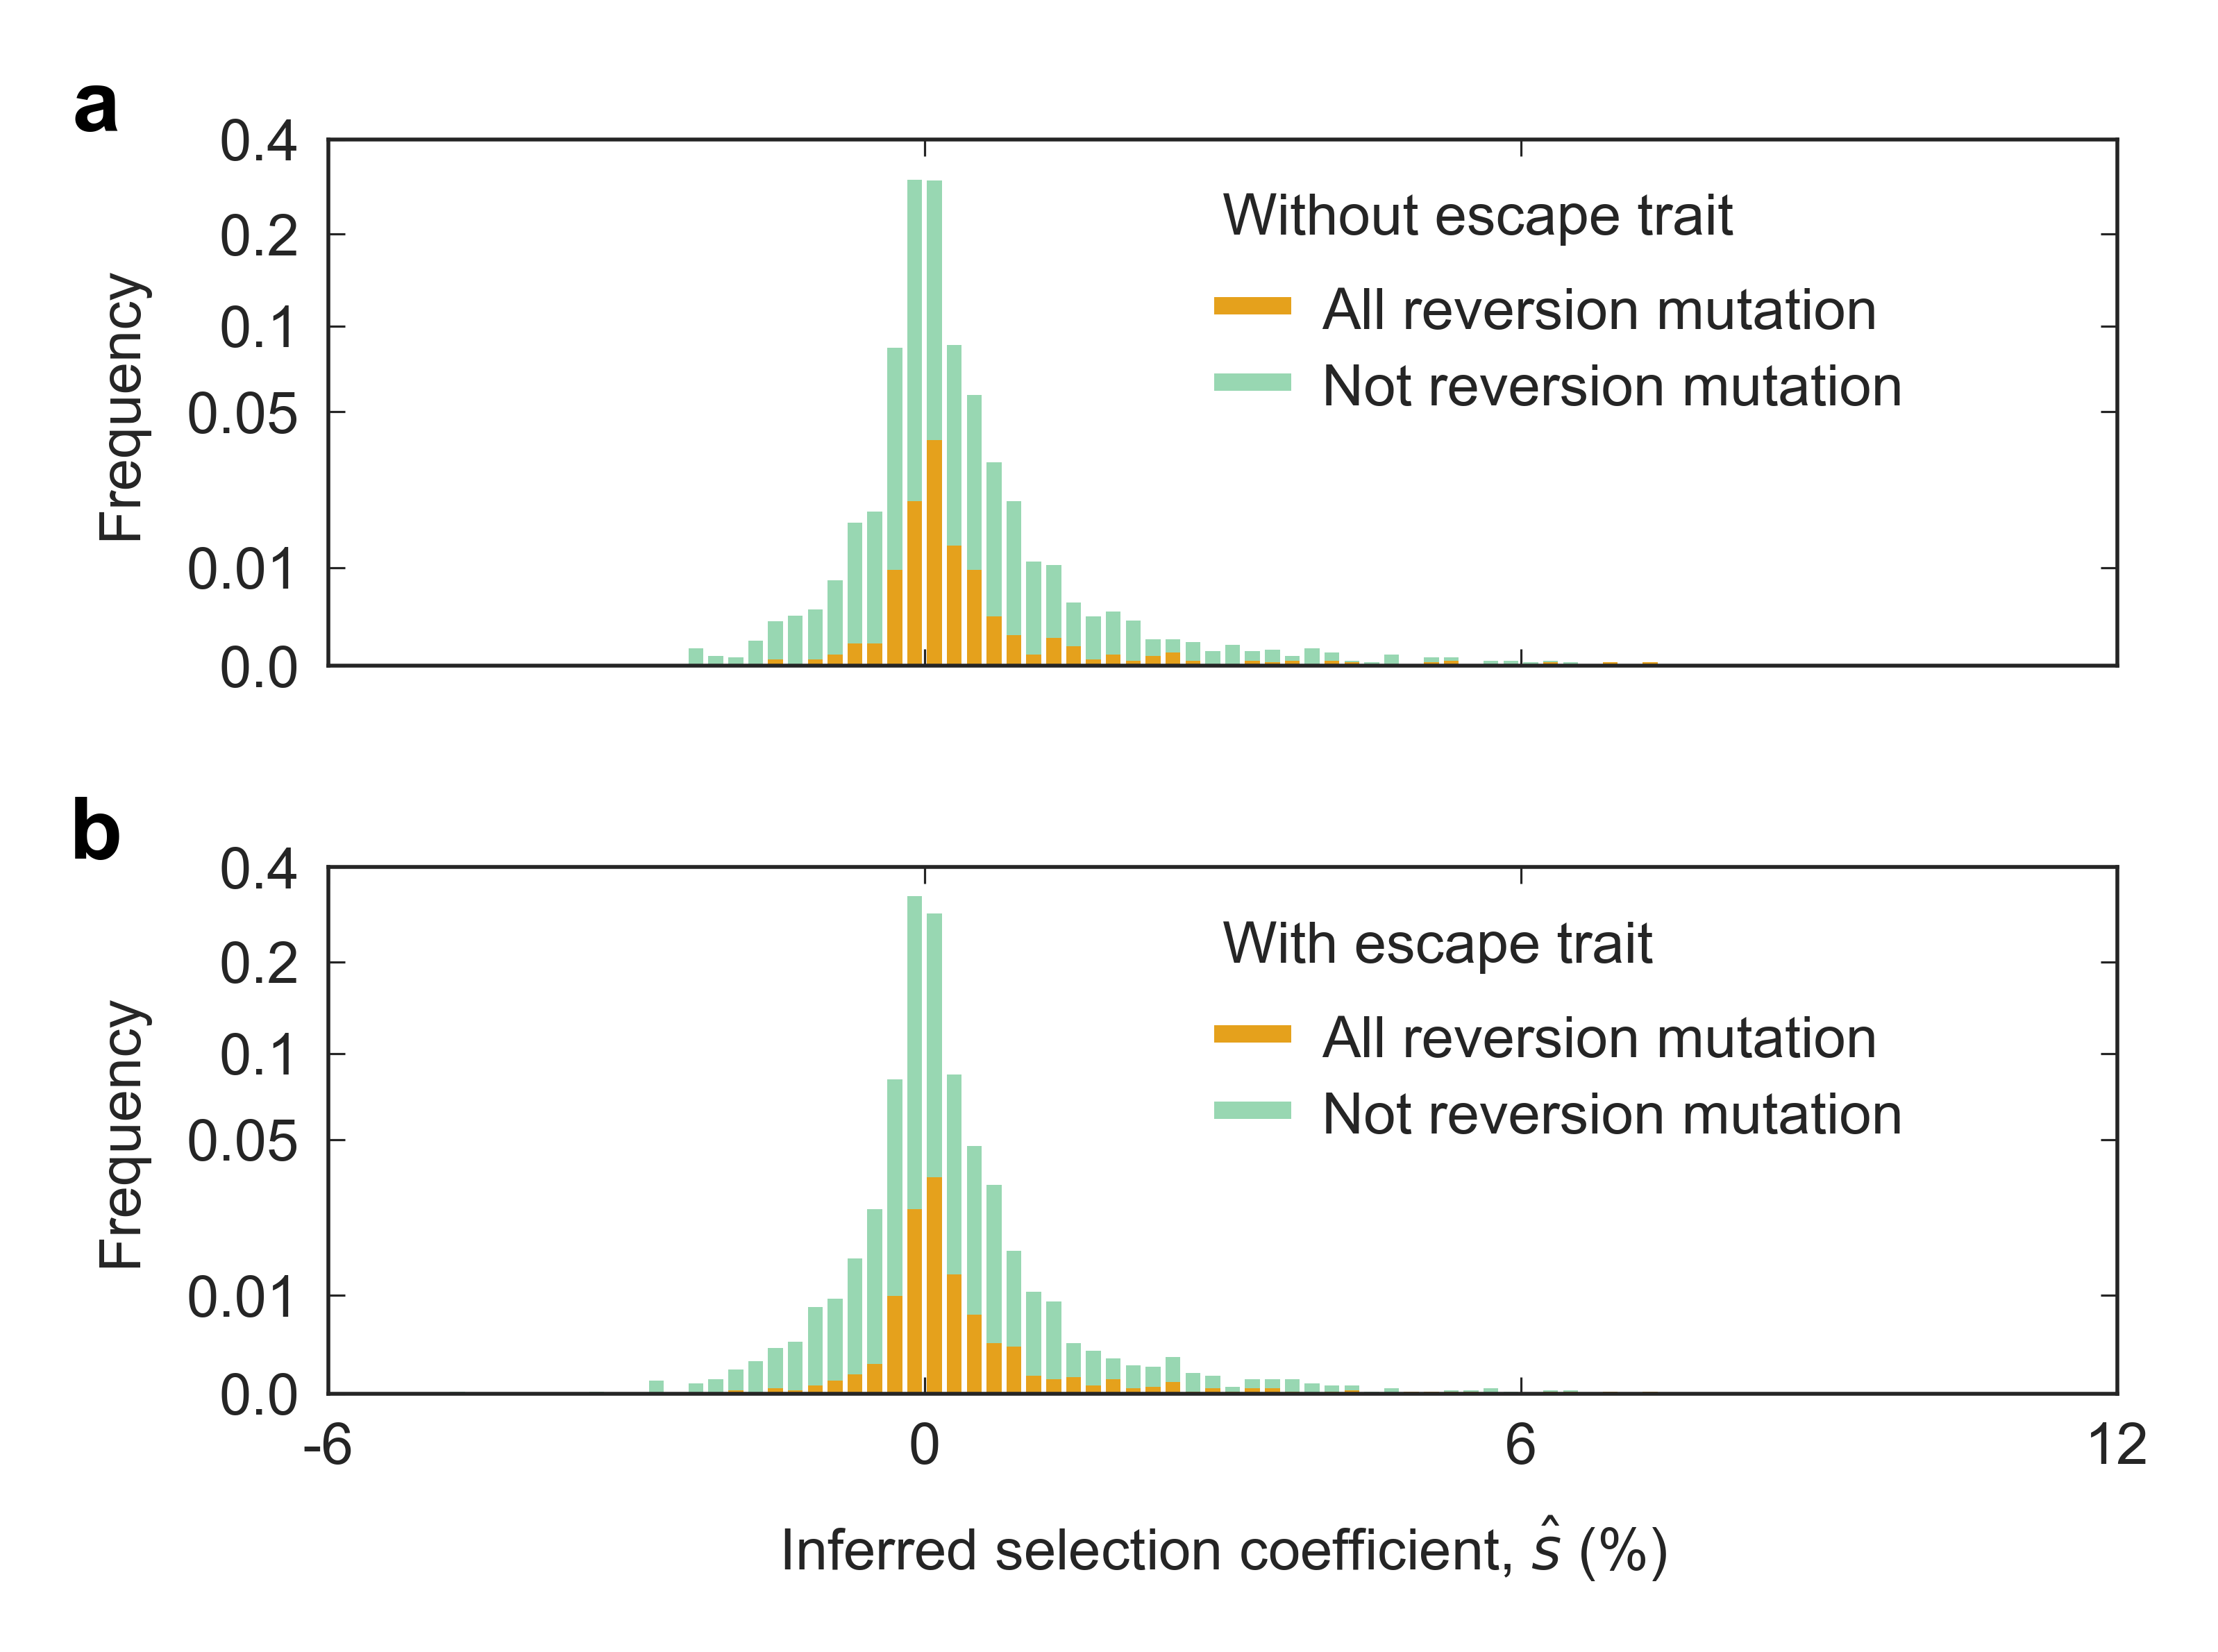

In [15]:
importlib.reload(mp)
importlib.reload(fig)

pdata = {
    'tags':['700010040-3', '700010040-5', '700010058-3', '700010058-5', '700010077-3', '700010077-5',
            '700010470-3', '700010470-5', '700010607-3', '700010607-5', '703010131-3', '703010131-5', 
            '703010159-3', '703010159-5', '703010256-3', '703010256-5', '704010042-3', '704010042-5', 
            '705010162-3', '705010162-5', '705010185-3', '705010185-5', '705010198-3', '705010198-5', 
            '706010164-3', '706010164-5']
}

fig.plot_site_reversion(**pdata)
plt.show()


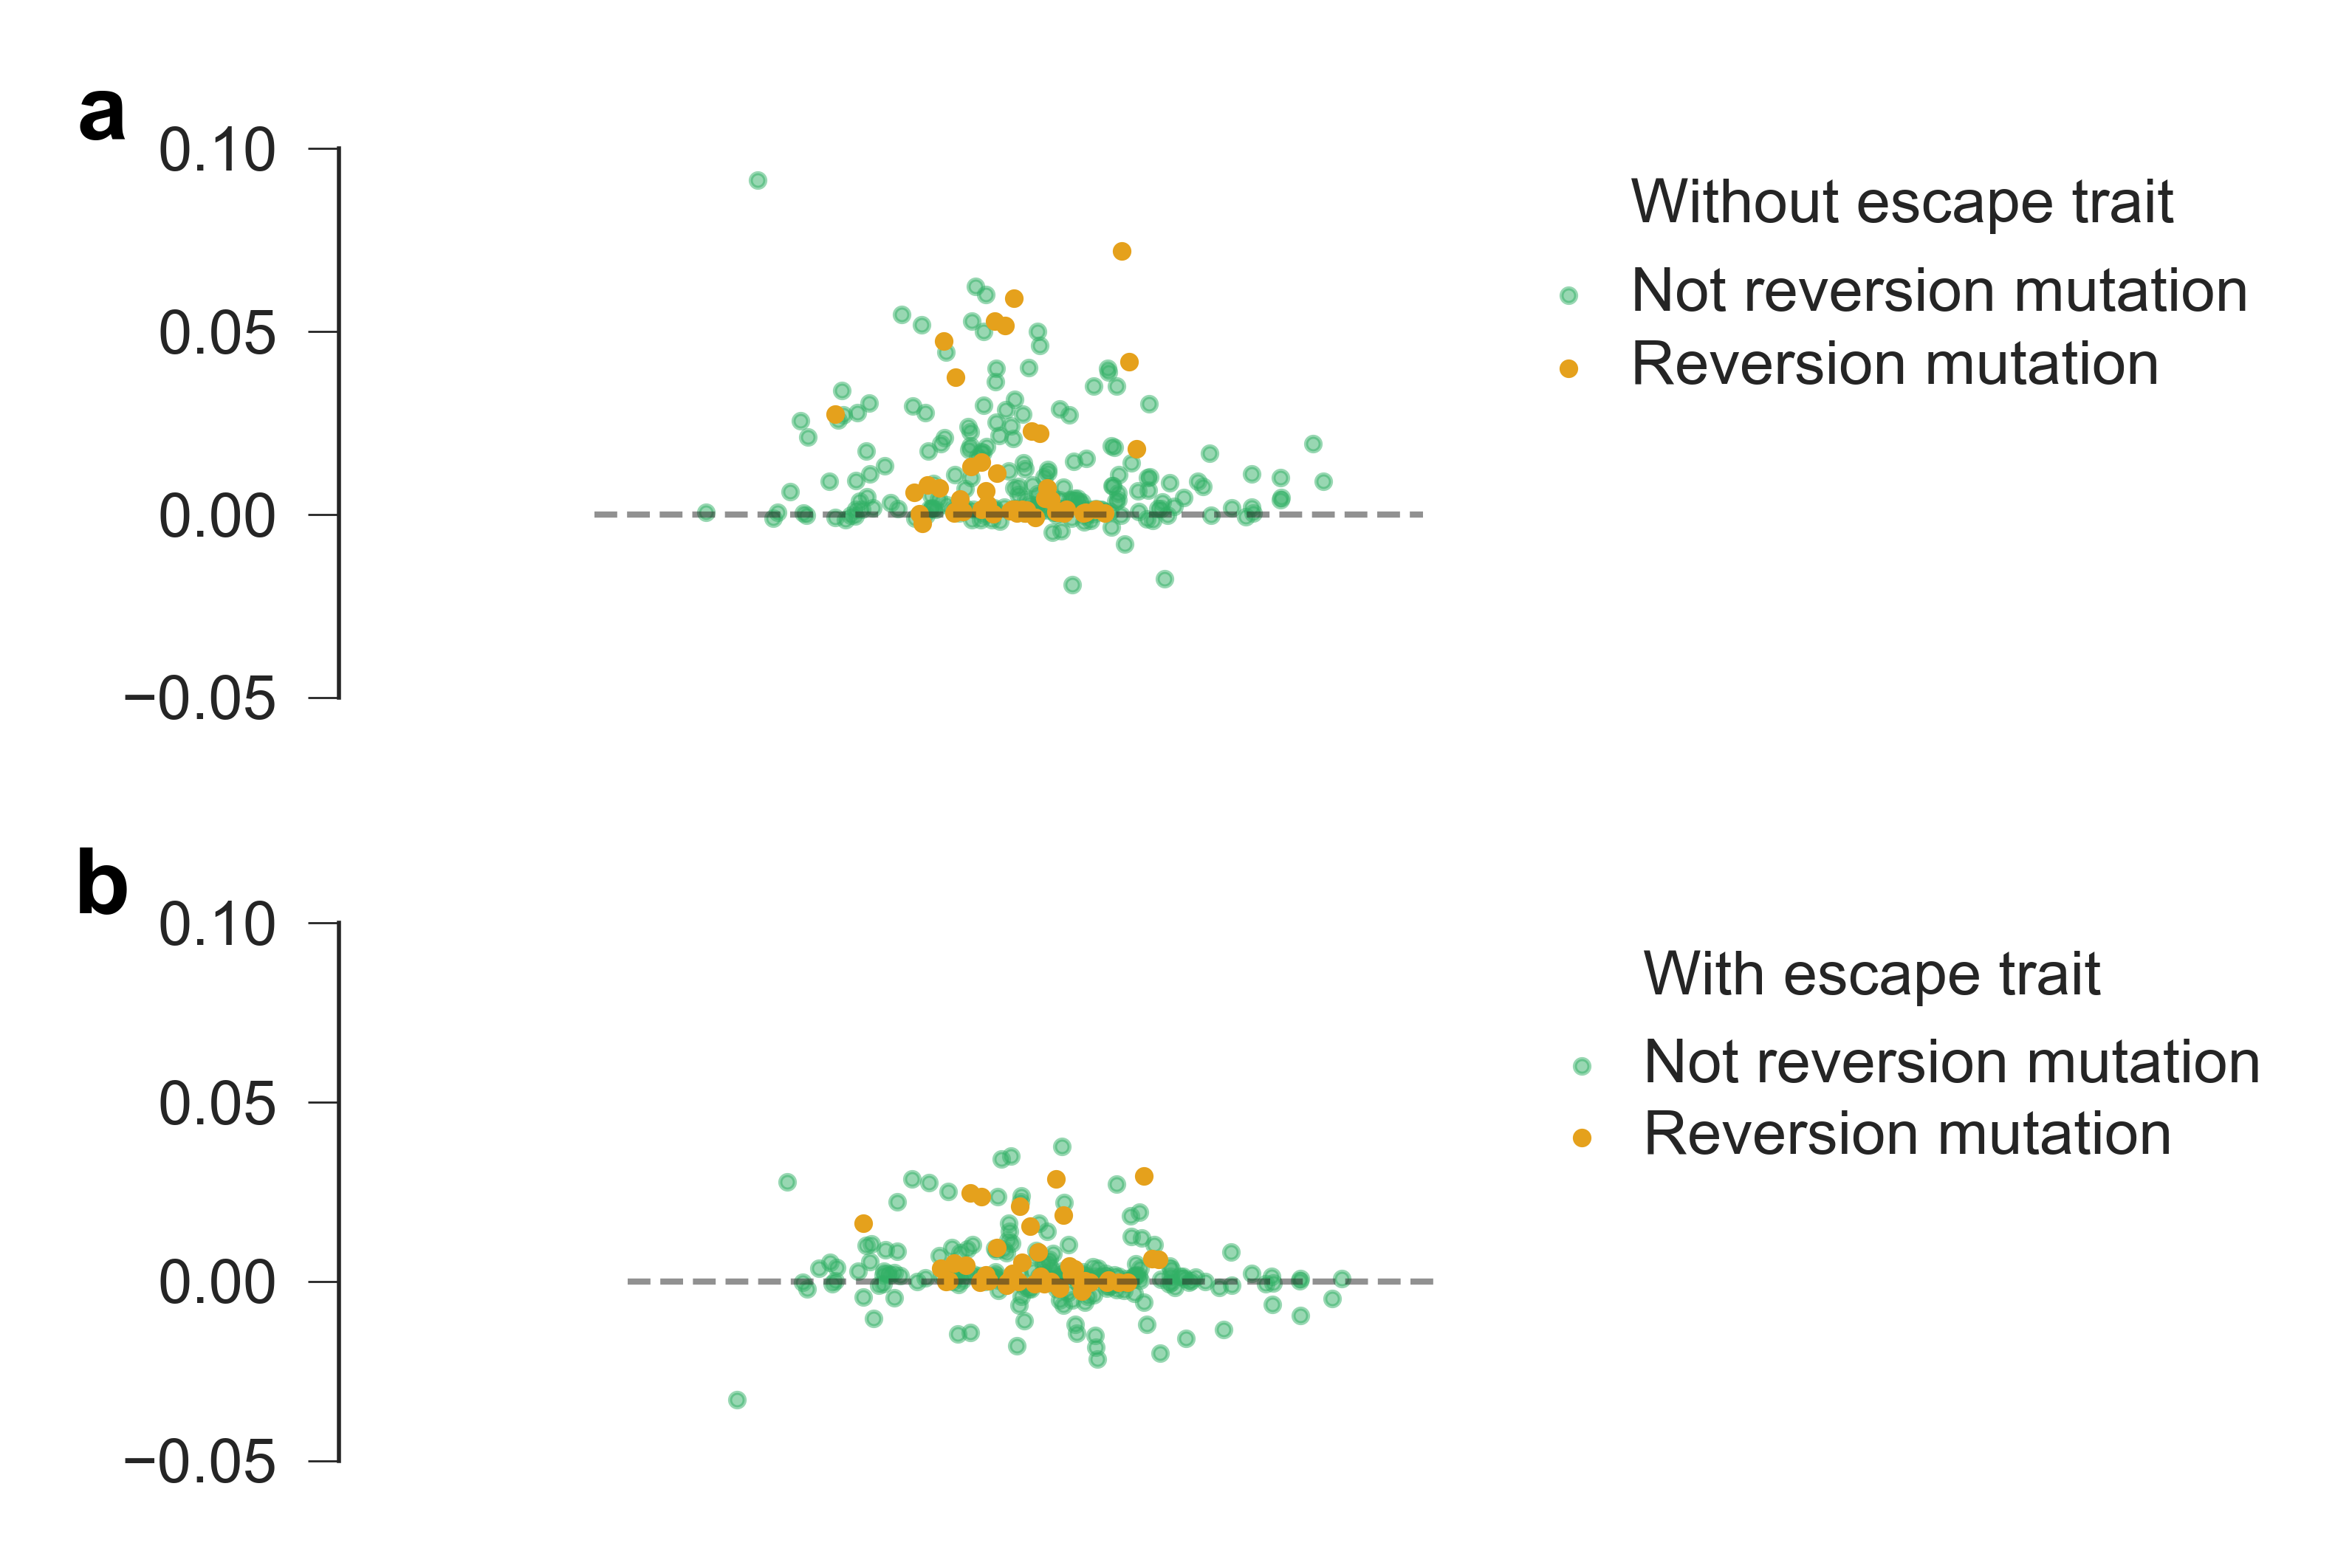

In [16]:
importlib.reload(mp)
importlib.reload(fig)

pdata = {
    'tags':       ['700010040-3','700010058-3','700010077-3','700010470-3',
                   '700010470-5','700010607-3','703010131-3','703010131-5',
                   '703010159-3','703010256-3','703010256-5','704010042-3',
                   '705010162-3','705010162-5','705010185-5','705010198-3',
                   '706010164-3']
}

fig.plot_reversion_scatter(**pdata)
plt.show()